# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time
from datetime import datetime 

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [2]:
model_name = 'deepseek-coder-v2'
CONFIG = {
    'model': model_name,   # 'mistral' # "starcoder2"
}

file_db = "~/Downloads/datasets/chinook.db"

clean_and_train = True  # False  

sql_id = 1
NUM_RETRY = 3

allow_llm_to_see_data = True
# allow_llm_to_see_data (bool): Whether to allow the LLM to see the data (for the purposes of introspecting the data to generate the final SQL).

In [3]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

def my_vn_ask(question, sql_id, allow_llm_to_see_data=False, num_retry=NUM_RETRY, separator=80*'='):
    # allow retry by appending error msg to question
    print(f"\n{separator}\n# QUESTION - {sql_id}:  {question}\n{separator}\n")
    sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
        return sql, df, fig, err_msg

    for i_retry in range(num_retry-1):
        msg = f"*** RETRY {i_retry+1} ***" 
        print(msg)
        question = f"""
        For the question {question}, 
        the generated SQL statement {sql} results in the following exception {err_msg} .
        Please fix the error and re-generate the SQL
        """
        
        sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
        if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
            break       

    return sql, df, fig, err_msg  

In [4]:
vn = MyVanna(config=CONFIG)

In [5]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: papa-game


In [6]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [7]:
vn.run_sql_is_set

True

In [8]:
if clean_and_train:
    remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [9]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [10]:
df_ddl

,type,sql
0,table,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [11]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")

    doc_str = """
    In the 'customers' table, address column names do not have 'Billing' prefix, 
    e.g. country column name is 'country', not 'BillingCountry'
    """
    vn.train(documentation=doc_str)


Adding ddl: CREATE TABLE "albums"
(
    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE TABLE "artists"
(
    ArtistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Name NVARCHAR(120)
)
Adding ddl: CREATE TABLE "customers"
(
    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TAB

In [12]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl,None,"CREATE TABLE ""artists""\r\n(\r\n ArtistId IN...",ddl
1,0db84e3d-ef41-563c-803e-21c1b985dc19-ddl,None,"CREATE TABLE ""invoices""\r\n(\r\n InvoiceId ...",ddl
2,10cba811-ddba-5042-9e90-d764dfcd1629-ddl,None,"CREATE INDEX IFK_InvoiceCustomerId ON ""invoice...",ddl
3,2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl,None,"CREATE INDEX IFK_CustomerSupportRepId ON ""cust...",ddl
4,37319c81-65f7-50ee-956b-795de244bee5-ddl,None,"CREATE TABLE sqlite_stat1(tbl,idx,stat)",ddl
5,40bd77cd-e1de-5872-8693-624117ff413c-ddl,None,"CREATE INDEX IFK_InvoiceLineInvoiceId ON ""invo...",ddl
6,41130543-7164-562a-90a7-0fd0a409c154-ddl,None,"CREATE TABLE ""albums""\r\n(\r\n AlbumId INTE...",ddl
7,458debc8-8082-5450-a17a-66028bd55ace-ddl,None,"CREATE TABLE ""playlists""\r\n(\r\n PlaylistI...",ddl
8,4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl,None,"CREATE TABLE ""invoice_items""\r\n(\r\n Invoi...",ddl
9,48d484e9-984c-58ff-b391-75521c69d486-ddl,None,"CREATE INDEX IFK_PlaylistTrackTrackId ON ""play...",ddl


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

In [13]:
ts_start = time()

```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```


In [14]:
questions = [
    "Can you list all tables in the SQLite database catalog?",
    "which table stores customer's orders",
    "How many customers are there",
    "what are the top 5 countries that customers come from?",
    "List all albums and their corresponding artist names  ",
    """Find all tracks with a name containing "What" (case-insensitive) """,
    "Get the total number of invoices for each customer",
    "Find the total number of invoices per country",
    "List all invoices with a total exceeding $10",
    "Find all invoices since 2010 and the total amount invoiced:",
    "List all employees and their reporting manager's name (if any):",
    " Get the average invoice total for each customer:",
    "Find the top 5 most expensive tracks (based on unit price):",
    "List all genres and the number of tracks in each genre:",
    "Get all genres that do not have any tracks associated with them:",
    "List all customers who have not placed any orders:",
    """ 
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    """,
    "List all customers from Canada and their email addresses:",
    "Find the customer with the most invoices ",
    "Find the customer who bought the most albums in total quantity (across all invoices):",
    """      
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    """,
    """  
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    """,
    "Get all playlists containing at least 10 tracks and the total duration of those tracks:",
    "Identify artists who have albums with tracks appearing in multiple genres:",
]

### Loop over questions





# QUESTION  - 2:  Can you list all tables in the SQLite database catalog?



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT name FROM sqlite_master WHERE type='table';


[( <SQL> )]
generated SQL statement



SELECT name FROM sqlite_master WHERE type='table';


[( <DataFrame> )]
queried dataframe



,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go
import pandas as pd

# Assuming df is your DataFrame
if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=len(df),
        title={"text": "Number of Tables"},
        number={'prefix': ''}
    ))
else:
    table_names = df['name'].tolist()
    fig = go.Figure(data=[go.Table(columnwidth=[50]*len(table_names), header=dict(values=['Tables'], fill_color='paleturquoise', align='left'), cells=dict(values=[table_names], fill_color='lavender', align='left'))])

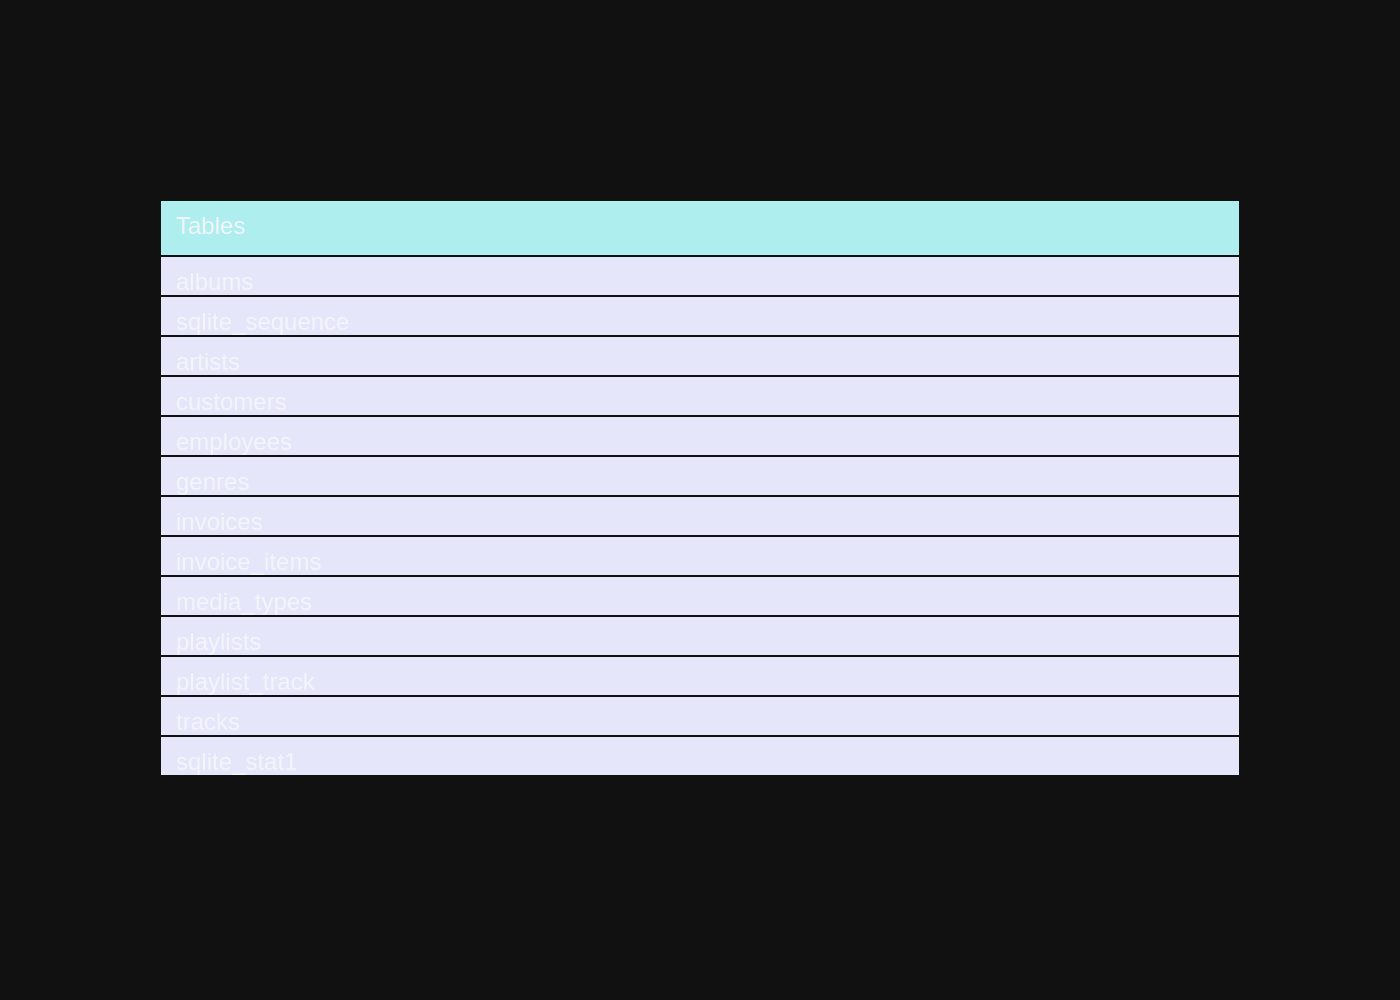





# QUESTION  - 3:  which table stores customer's orders



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( RETRY )]
***** 1 *****


Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( RETRY )]
***** 2 *****


Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
with `SELECT` and provides the information about which table stores customer's orders in the Chinook database:

```sql
SELECT 'The "invoices" table stores customers'' orders in the Chinook database. Each order (invoice) is associated with a specific customer via the foreign key relationship to the "customers" table, where each invoice is linked to a unique CustomerId.' AS result;


[( <SQL> )]
generated SQL statement



with `SELECT` and provides the information about which table stores customer's orders in the Chinook database:

```sql
SELECT 'The "invoices" table stores customers'' orders in the Chinook database. Each order (invoice) is associated with a specific customer via the foreign key relationship to the "customers" table, where each invoice is linked to a unique CustomerId.' AS result;


[( RETRY )]
***** 3 *****


Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
with `SELECT`, we can simply remove the text before the keyword `SELECT`. Here is the corrected SQL statement:

```sql
SELECT 'The "invoices" table stores customers'' orders in the Chinook database. Each order (invoice) is associated with a specific customer via the foreign key relationship to the "customers" table, where each invoice is linked to a unique CustomerId.' AS result LIMIT 20;


[( <SQL> )]
generated SQL statement



with `SELECT`, we can simply remove the text before the keyword `SELECT`. Here is the corrected SQL statement:

```sql
SELECT 'The "invoices" table stores customers'' orders in the Chinook database. Each order (invoice) is associated with a specific customer via the foreign key relationship to the "customers" table, where each invoice is linked to a unique CustomerId.' AS result LIMIT 20;





# QUESTION  - 4:  How many customers are there



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT COUNT(*) AS NumberOfCustomers
FROM customers;


Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT COUNT(*) AS NumberOfCustomers
FROM customers;


[( <SQL> )]
generated SQL statement



SELECT COUNT(*) AS NumberOfCustomers
FROM customers;


[( <DataFrame> )]
queried dataframe



,NumberOfCustomers
0,59



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame and it has a single row with the number of customers
if len(df) == 1:
    fig = px.indicator(value=df['NumberOfCustomers'].iloc[0], title='Number of Customers')
else:
    fig = px.bar(df, x='NumberOfCustomers', y=['NumberOfCustomers'], color='NumberOfCustomers', orientation='h', text_auto='.2s')

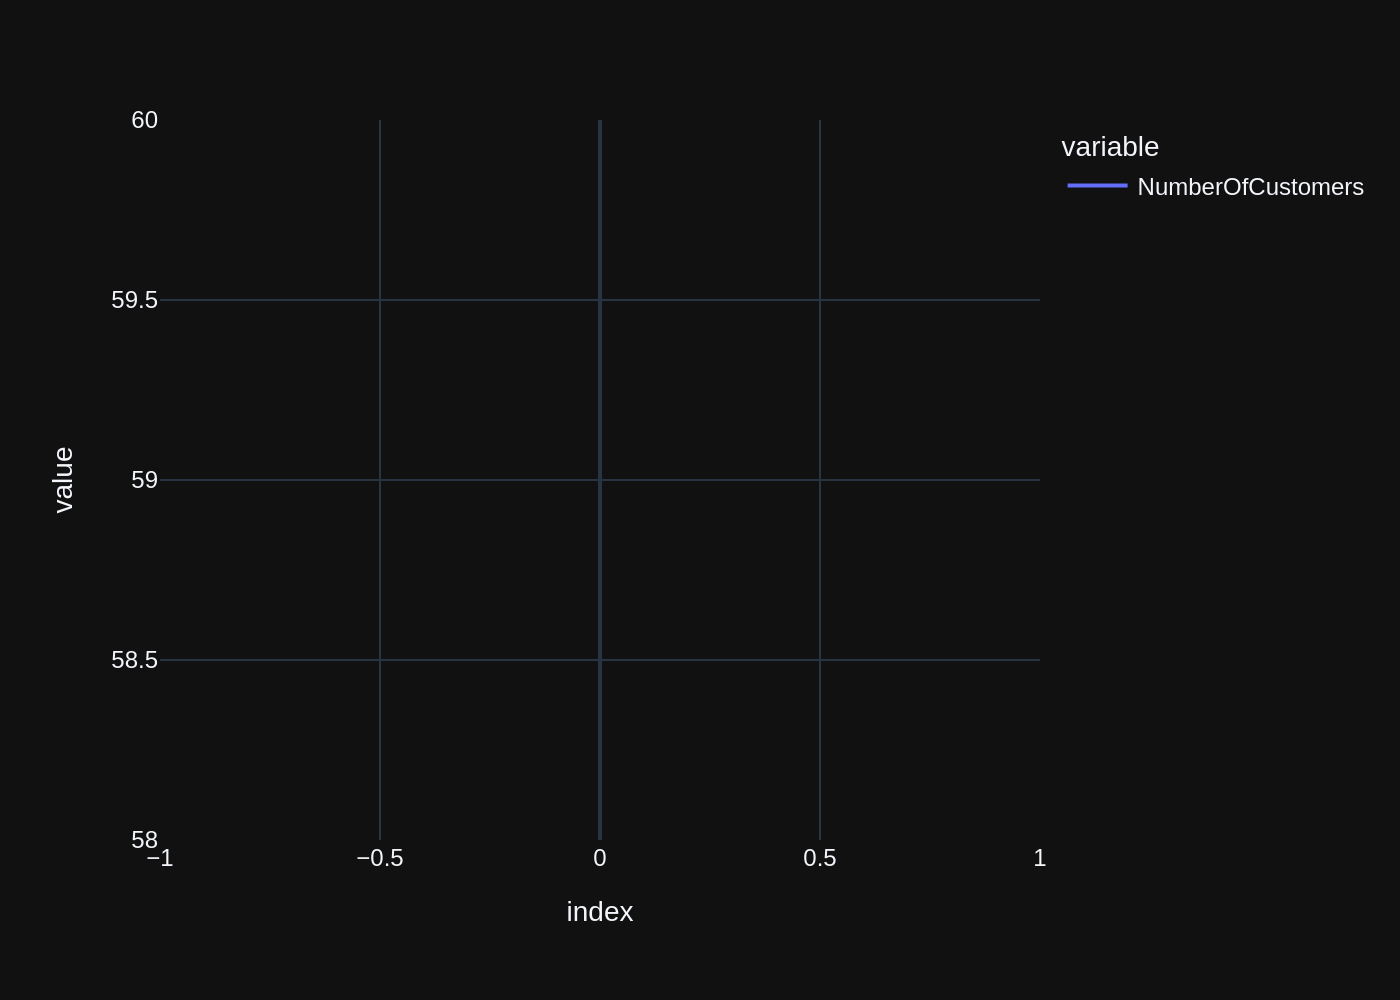





# QUESTION  - 5:  what are the top 5 countries that customers come from?



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT Country, COUNT(*) AS CustomerCount
FROM customers
GROUP BY Country
ORDER BY CustomerCount DESC
LIMIT 5;


[( <SQL> )]
generated SQL statement



SELECT Country, COUNT(*) AS CustomerCount
FROM customers
GROUP BY Country
ORDER BY CustomerCount DESC
LIMIT 5;


[( <DataFrame> )]
queried dataframe



,Country,CustomerCount
0,USA,13
1,Canada,8
2,France,5
3,Brazil,5
4,Germany,4



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
import pandas as pd

# Assuming df is already defined and contains the data
if len(df) == 1:
    fig = px.indicator(df, title="Top Country by Customer Count")
else:
    fig = px.bar(df, x='Country', y='CustomerCount', text_auto=True, title="Top 5 Countries by Customer Count")

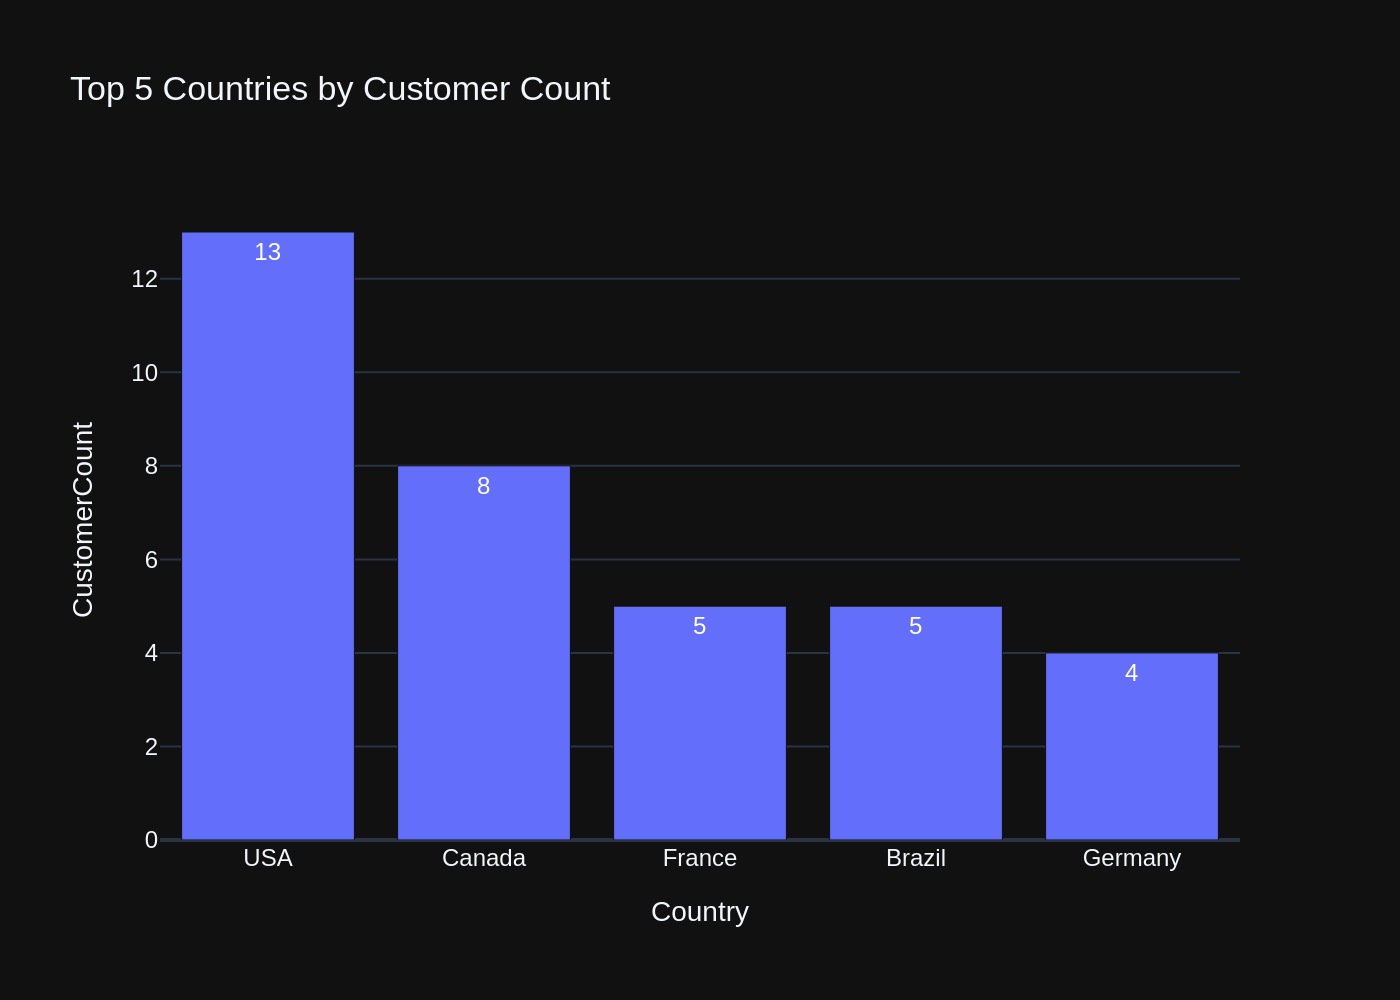





# QUESTION  - 6:  List all albums and their corresponding artist names  



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT a.Title AS AlbumTitle, ar.Name AS ArtistName
FROM albums a
JOIN artists ar ON a.ArtistId = ar.ArtistId;


Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT a.Title AS AlbumTitle, ar.Name AS ArtistName
FROM albums a
JOIN artists ar ON a.ArtistId = ar.ArtistId;


[( <SQL> )]
generated SQL statement



SELECT a.Title AS AlbumTitle, ar.Name AS ArtistName
FROM albums a
JOIN artists ar ON a.ArtistId = ar.ArtistId;


[( <DataFrame> )]
queried dataframe



,AlbumTitle,ArtistName
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith
5,Jagged Little Pill,Alanis Morissette
6,Facelift,Alice In Chains
7,Warner 25 Anos,Antônio Carlos Jobim
8,Plays Metallica By Four Cellos,Apocalyptica
9,Audioslave,Audioslave



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go
import pandas as pd

# Assuming df is your DataFrame
if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=1,
        title={"text": "Unique Album and Artist"}
    ))
else:
    fig = go.Figure(data=[go.Table(header=dict(values=['AlbumTitle', 'ArtistName']),
                                   cells=dict(values=[[row['AlbumTitle'] for index, row in df.iterrows()], [row['ArtistName'] for index, row in df.iterrows()]])
                                  )
                         ]
                   )

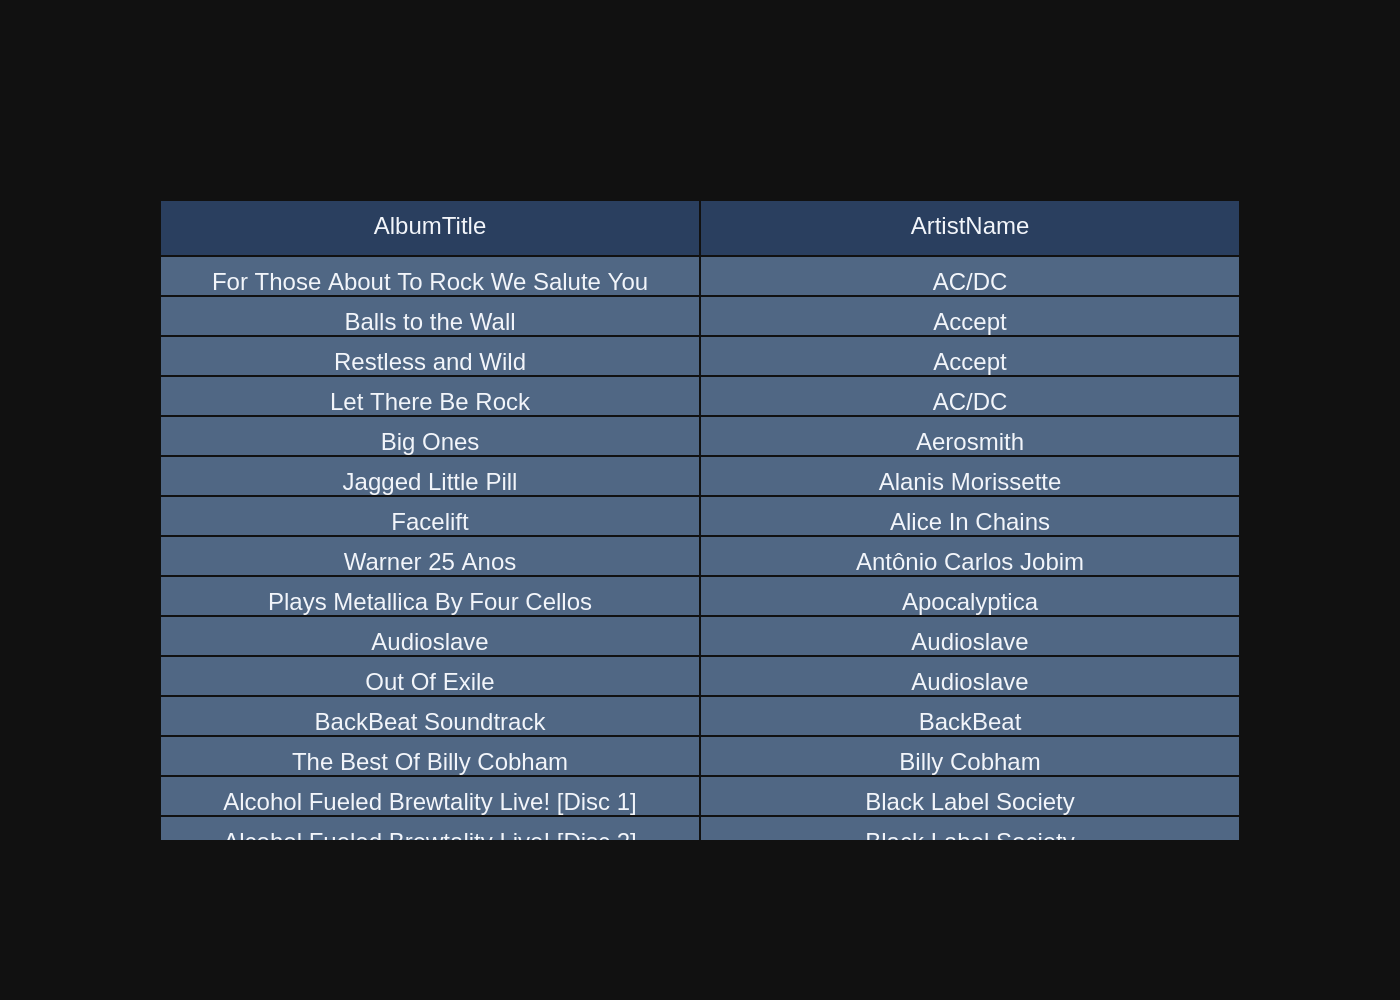





# QUESTION  - 7:  Find all tracks with a name containing "What" (case-insensitive) 



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT * 
FROM tracks
WHERE LOWER(TrackName) LIKE '%what%' LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT * 
FROM tracks
WHERE LOWER(TrackName) LIKE '%what%' LIMIT 20;


[( RETRY )]
***** 1 *****


Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
with a name containing "What" (case-insensitive):

```sql
SELECT * 
FROM tracks
WHERE LOWER(Name) LIKE '%what%' LIMIT 20;


[( <SQL> )]
generated SQL statement



with a name containing "What" (case-insensitive):

```sql
SELECT * 
FROM tracks
WHERE LOWER(Name) LIKE '%what%' LIMIT 20;


[( RETRY )]
***** 2 *****


Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT * 
FROM tracks
WHERE LOWER(Name) LIKE '%what%' LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT * 
FROM tracks
WHERE LOWER(Name) LIKE '%what%' LIMIT 20;


[( <DataFrame> )]
queried dataframe



,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,26,What It Takes,5,1,1,"Steven Tyler, Joe Perry, Desmond Child",310622,10144730,0.99
1,88,What You Are,10,1,1,Audioslave/Chris Cornell,249391,5988186,0.99
2,130,Do what cha wanna,13,1,2,George Duke,274155,9018565,0.99
3,342,What is and Should Never Be,30,1,1,Jimmy Page/Robert Plant,260675,8497116,0.99
4,607,So What,48,1,2,Miles Davis,564009,18360449,0.99
5,960,What A Day,76,1,1,"Mike Bordin, Billy Gould, Mike Patton",158275,5203430,0.99
6,1000,What If I Do?,80,1,1,"Dave Grohl, Taylor Hawkins, Nate Mendel, Chris...",302994,9929799,0.99
7,1039,What Now My Love,83,1,12,carl sigman/gilbert becaud/pierre leroyer,149995,4913383,0.99
8,1145,Whatsername,89,1,4,Green Day,252316,8244843,0.99
9,1440,"Whatever It Is, I Just Can't Stop",116,1,1,"Jay Kay/Kay, Jay",247222,8249453,0.99



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if df['Name'].nunique() == 1:
    fig = px.indicator(value=df['Name'][0], title="Track Name Indicator")
else:
    fig = px.bar(df, x='Name', y='UnitPrice', text='UnitPrice', color='GenreId')

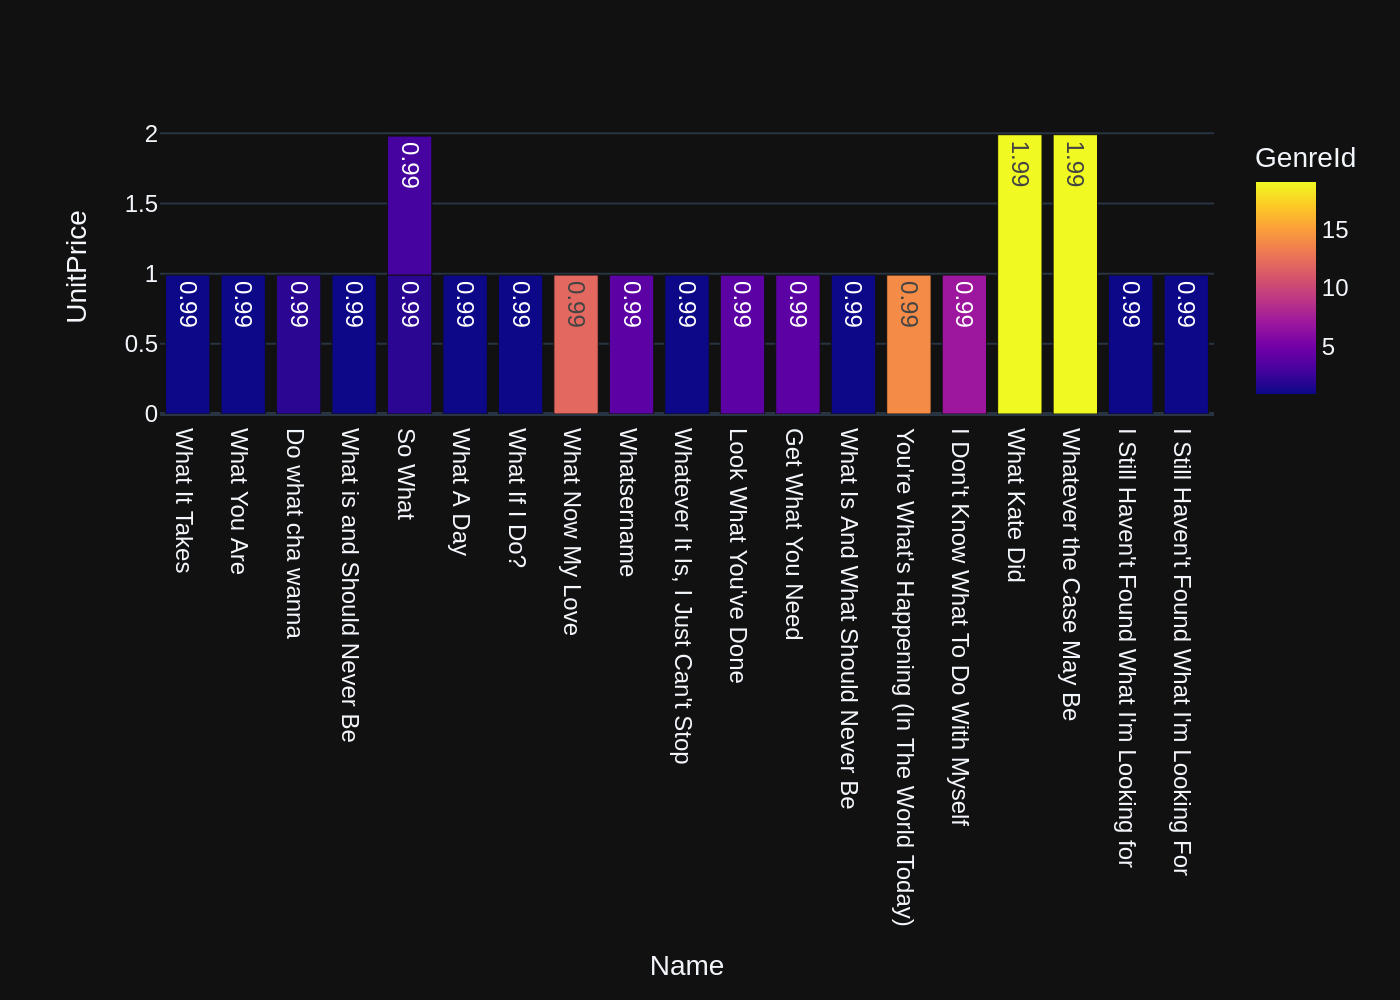





# QUESTION  - 8:  Get the total number of invoices for each customer



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT c.CustomerId, c.FirstName, c.LastName, COUNT(i.InvoiceId) AS TotalInvoices
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId, c.FirstName, c.LastName;


[( <SQL> )]
generated SQL statement



SELECT c.CustomerId, c.FirstName, c.LastName, COUNT(i.InvoiceId) AS TotalInvoices
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId, c.FirstName, c.LastName;


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,TotalInvoices
0,1,Luís,Gonçalves,7
1,2,Leonie,Köhler,7
2,3,François,Tremblay,7
3,4,Bjørn,Hansen,7
4,5,František,Wichterlová,7
5,6,Helena,Holý,7
6,7,Astrid,Gruber,7
7,8,Daan,Peeters,7
8,9,Kara,Nielsen,7
9,10,Eduardo,Martins,7



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go
import pandas as pd

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['TotalInvoices'].values[0],
        title={"text": "Total Invoices"}
    ))
else:
    fig = go.Figure(data=[go.Bar(x=df['LastName'], y=df['TotalInvoices'])])

fig.update_layout(title='Total Number of Invoices for Each Customer')

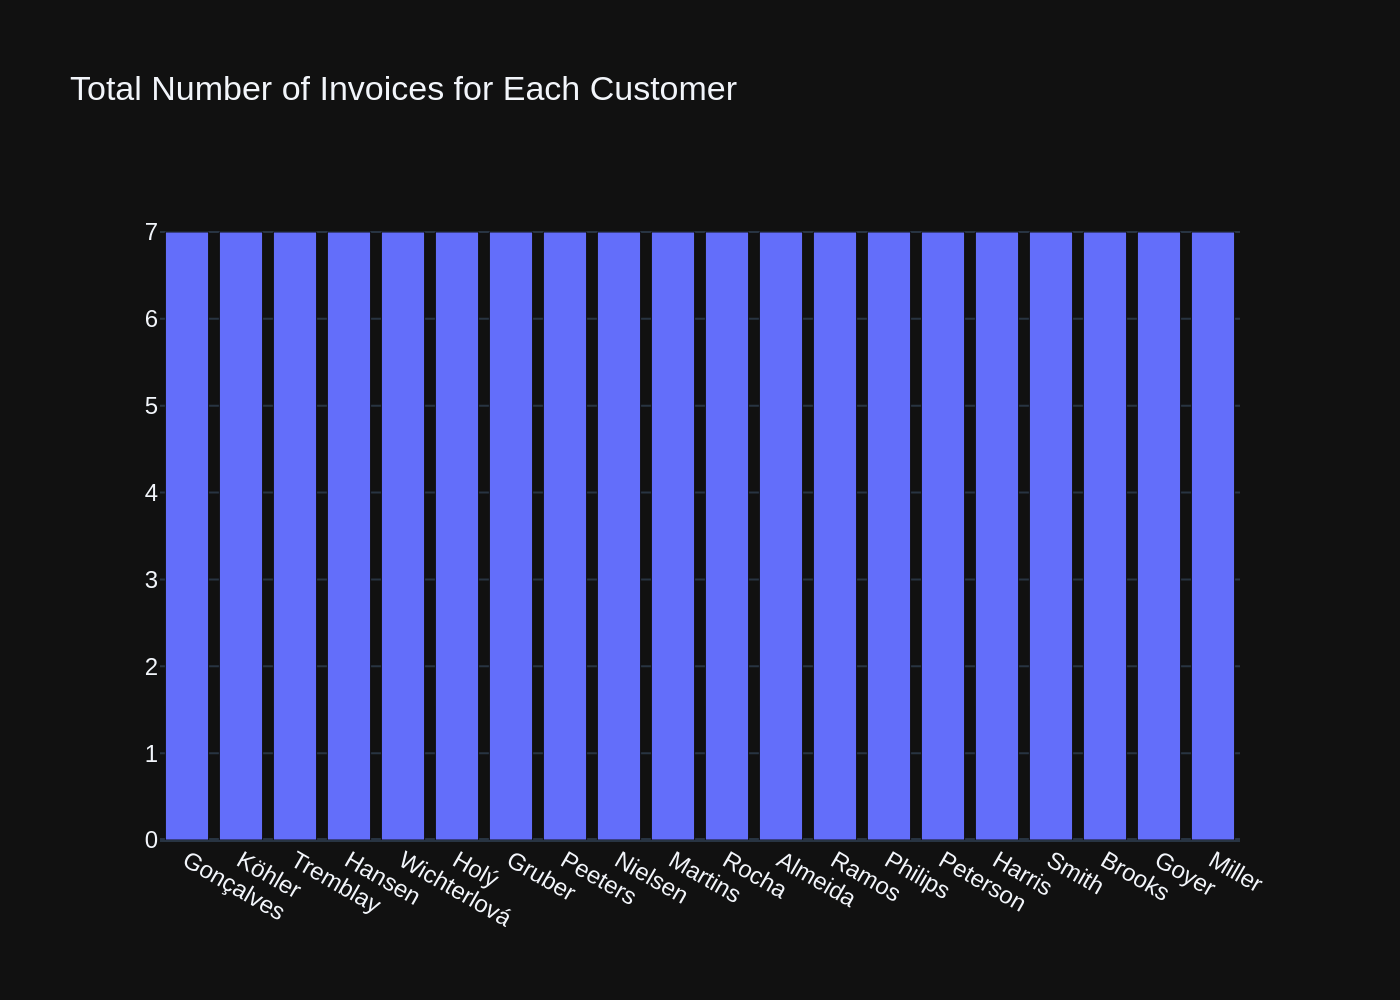





# QUESTION  - 9:  Find the total number of invoices per country



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT BillingCountry, COUNT(*) AS TotalInvoices
FROM invoices
GROUP BY BillingCountry ORDER BY TotalInvoices DESC LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT BillingCountry, COUNT(*) AS TotalInvoices
FROM invoices
GROUP BY BillingCountry ORDER BY TotalInvoices DESC LIMIT 20;


[( <DataFrame> )]
queried dataframe



,BillingCountry,TotalInvoices
0,USA,91
1,Canada,56
2,France,35
3,Brazil,35
4,Germany,28
5,United Kingdom,21
6,Portugal,14
7,Czech Republic,14
8,India,13
9,Sweden,7



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objs as go
import pandas as pd

if df['TotalInvoices'].nunique() == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['TotalInvoices'].iloc[0],
        title={"text": "Total Invoices"},
        number={'prefix': ''}
    ))
else:
    fig = px.bar(df, x='BillingCountry', y='TotalInvoices', text='TotalInvoices')

fig.update_layout(title='Total Number of Invoices per Country', xaxis_title='Country', yaxis_title='Total Invoices')

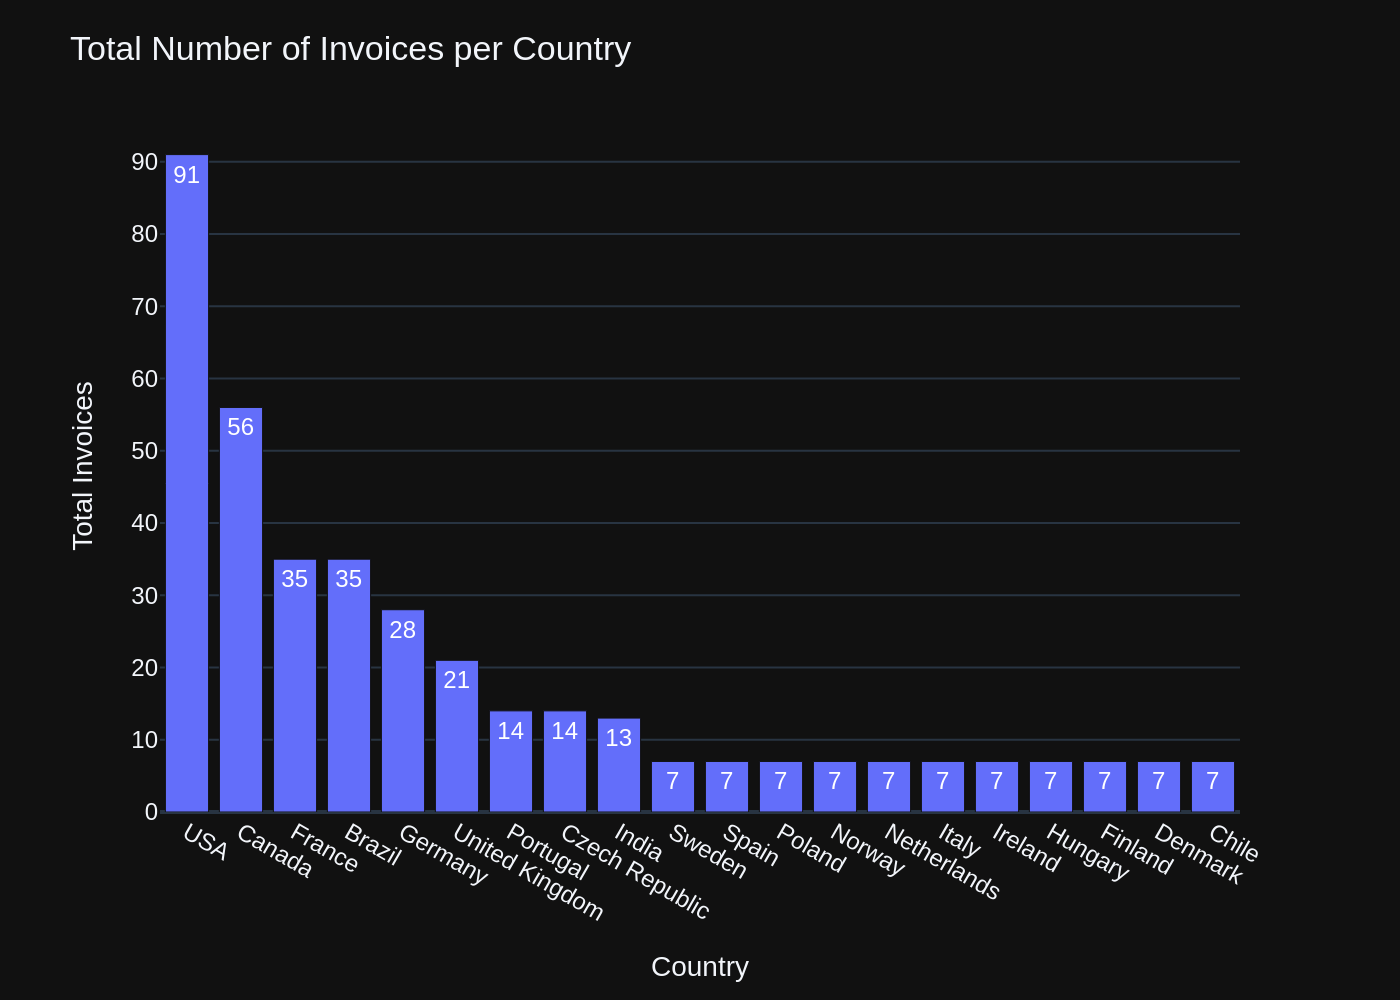





# QUESTION  - 10:  List all invoices with a total exceeding $10



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT *
FROM invoices
WHERE Total > 10 ORDER BY Total DESC LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT *
FROM invoices
WHERE Total > 10 ORDER BY Total DESC LIMIT 20;


[( <DataFrame> )]
queried dataframe



,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,404,6,2013-11-13 00:00:00,Rilská 3174/6,Prague,None,Czech Republic,14300,25.86
1,299,26,2012-08-05 00:00:00,2211 W Berry Street,Fort Worth,TX,USA,76110,23.86
2,96,45,2010-02-18 00:00:00,Erzsébet krt. 58.,Budapest,None,Hungary,H-1073,21.86
3,194,46,2011-04-28 00:00:00,3 Chatham Street,Dublin,Dublin,Ireland,None,21.86
4,89,7,2010-01-18 00:00:00,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,18.86
5,201,25,2011-05-29 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,18.86
6,88,57,2010-01-13 00:00:00,"Calle Lira, 198",Santiago,None,Chile,None,17.91
7,306,5,2012-09-05 00:00:00,Klanova 9/506,Prague,None,Czech Republic,14700,16.86
8,313,43,2012-10-06 00:00:00,"68, Rue Jouvence",Dijon,None,France,21000,16.86
9,103,24,2010-03-21 00:00:00,162 E Superior Street,Chicago,IL,USA,60611,15.86



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go
import pandas as pd

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['Total'].values[0],
        number={'prefix': '$'}
    ))
else:
    fig = go.Figure(data=[go.Scatter(x=df['InvoiceDate'], y=df['Total'], mode='lines+markers')])

fig.update_layout(title='Invoices with Total > $10', xaxis_title='Invoice Date', yaxis_title='Total ($)')

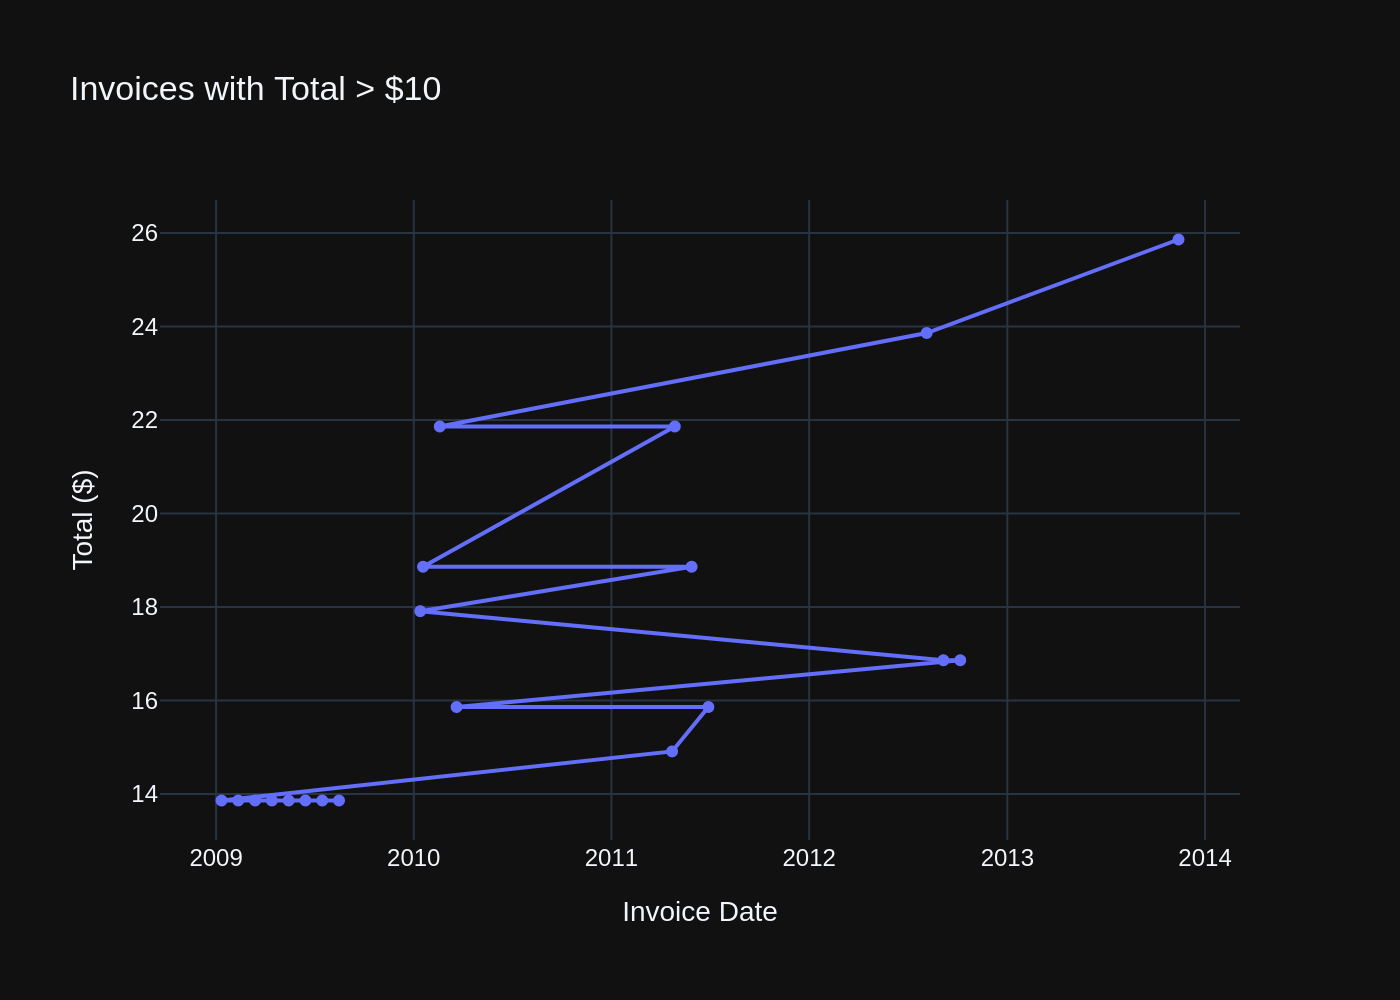





# QUESTION  - 11:  Find all invoices since 2010 and the total amount invoiced:



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[ERROR-SQL] Failed to generate SQL for prompt: Find all invoices since 2010 and the total amount invoiced: with the following exception: 
an unknown error was encountered while running the model 

Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[ERROR-SQL] Failed to generate SQL for prompt: Find all invoices since 2010 and the total amount invoiced: with the following exception: 
an unknown error was encountered while running the model 

[( RETRY )]
***** 1 *****


Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
with the total amount invoiced, you can use the following SQL query. This will sum up the `Total` column for each invoice where the `InvoiceDate` is greater than or equal to January 1, 2010.

```sql
SELECT InvoiceId, SUM(Total) AS 

with the total amount invoiced, you can use the following SQL query. This will sum up the `Total` column for each invoice where the `InvoiceDate` is greater than or equal to January 1, 2010.

```sql
SELECT InvoiceId, SUM(Total) AS TotalAmountInvoiced
FROM invoices
WHERE InvoiceDate >= '2010-01-01'
GROUP BY InvoiceId;


[( RETRY )]
***** 2 *****


Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[ERROR-SQL] Failed to generate SQL for prompt: 
                    For this question: 
                    For this question: Find all invoices since 2010 and the total amount invoiced:, 
                    your generated SQL statement: None results in the following error: [ERROR-SQL] Failed to generate SQL for prompt: Find all invoices since 2010 and the total amount invoiced: with the following exception: 
an unknown error was encountered while running the model  .
                    Can you please fix this error and re-generate the SQL statement?
                , 
                    your generated SQL statement: with the total amount invoiced, you can use the following SQL query. This will sum up the `Total` column for each invoice where the `InvoiceDate` is greater than or equal to January 1, 2010.

```sql
SELECT InvoiceId, SUM(Total) AS TotalAmountInvoiced
FROM invoice

SELECT e.FirstName || ' ' || e.LastName AS EmployeeName, m.FirstName || ' ' || m.LastName AS ManagerName
FROM employees e
LEFT JOIN employees m ON e.ReportsTo = m.EmployeeId LIMIT 20;


[( <DataFrame> )]
queried dataframe



,EmployeeName,ManagerName
0,Andrew Adams,None
1,Nancy Edwards,Andrew Adams
2,Jane Peacock,Nancy Edwards
3,Margaret Park,Nancy Edwards
4,Steve Johnson,Nancy Edwards
5,Michael Mitchell,Andrew Adams
6,Robert King,Michael Mitchell
7,Laura Callahan,Michael Mitchell



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go
import pandas as pd

# Assuming df is your DataFrame
if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=1,
        title={"text": "Employee and Manager Relationship"}
    ))
else:
    fig = go.Figure(data=[go.Table(
        header=dict(values=['Employee Name', 'Manager Name'], fill_color='paleturquoise', align='left'),
        cells=dict(values=[df['EmployeeName'], df['ManagerName']], fill_color='lavender', align='left'))
    ])

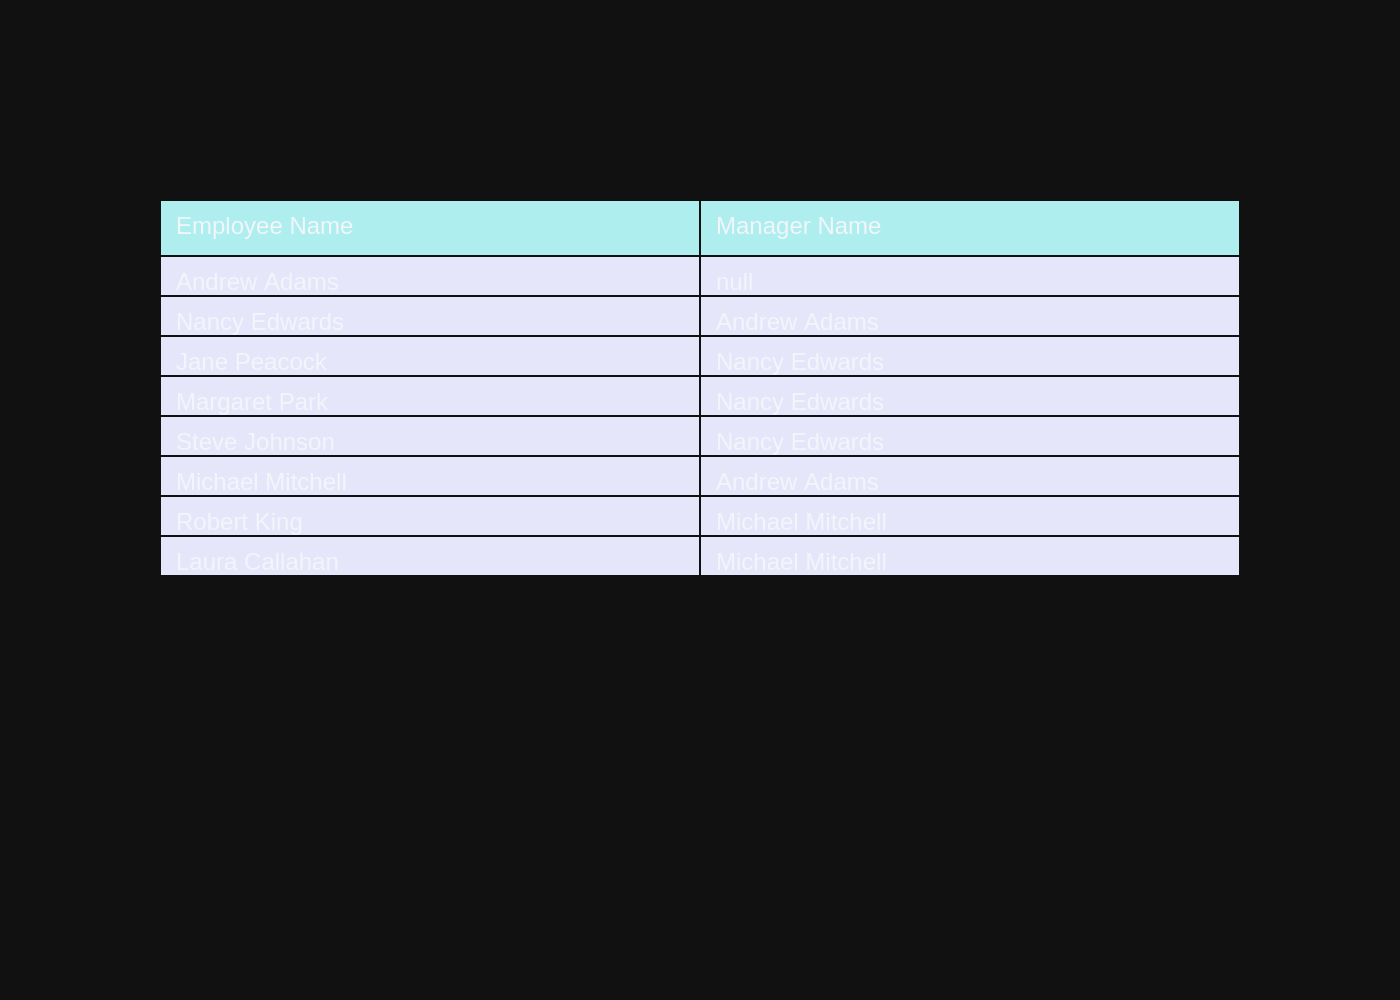





# QUESTION  - 13:   Get the average invoice total for each customer:



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT c.CustomerId, c.FirstName, c.LastName, AVG(i.Total) AS AverageInvoiceTotal
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId, c.FirstName, c.LastName LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT c.CustomerId, c.FirstName, c.LastName, AVG(i.Total) AS AverageInvoiceTotal
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId, c.FirstName, c.LastName LIMIT 20;


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,AverageInvoiceTotal
0,1,Luís,Gonçalves,5.660000
1,2,Leonie,Köhler,5.374286
2,3,François,Tremblay,5.660000
3,4,Bjørn,Hansen,5.660000
4,5,František,Wichterlová,5.802857
5,6,Helena,Holý,7.088571
6,7,Astrid,Gruber,6.088571
7,8,Daan,Peeters,5.374286
8,9,Kara,Nielsen,5.374286
9,10,Eduardo,Martins,5.374286



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go
import numpy as np

if df['AverageInvoiceTotal'].nunique() == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['AverageInvoiceTotal'].iloc[0],
        title={"text": "Average Invoice Total"},
        domain={'x': [0, 1], 'y': [0, 1]}
    ))
else:
    fig = go.Figure(data=[go.Bar(x=df['FirstName'] + ' ' + df['LastName'], y=df['AverageInvoiceTotal'])])

fig.update_layout(title='Average Invoice Total for Each Customer', xaxis_title='Customer Name', yaxis_title='Average Invoice Total')

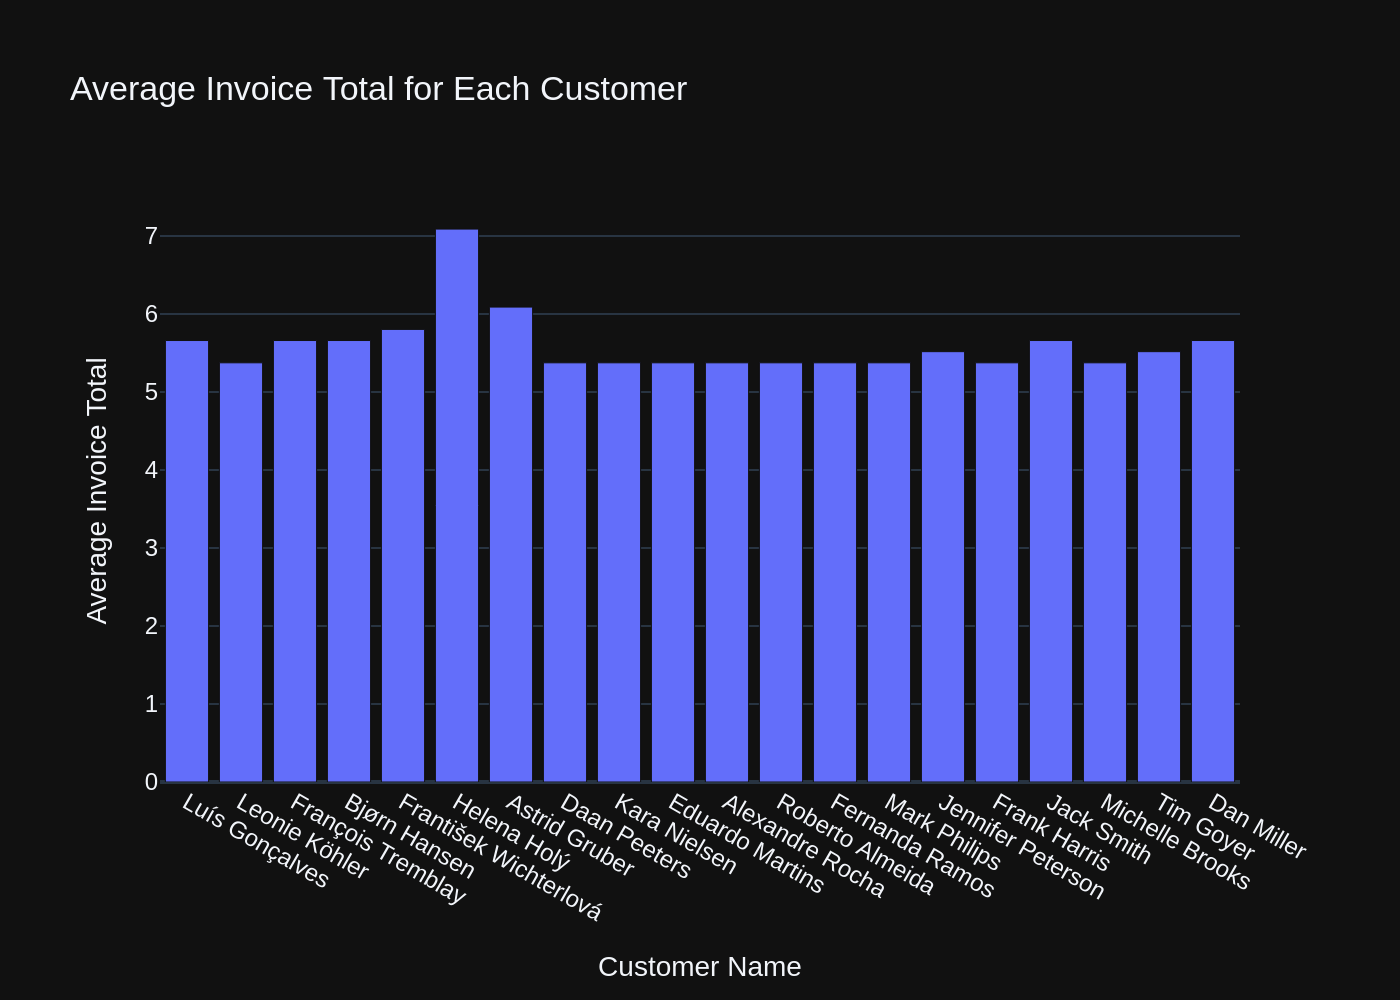





# QUESTION  - 14:  Find the top 5 most expensive tracks (based on unit price):



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT Name, UnitPrice
FROM tracks
ORDER BY UnitPrice DESC
LIMIT 5;


[( <SQL> )]
generated SQL statement



SELECT Name, UnitPrice
FROM tracks
ORDER BY UnitPrice DESC
LIMIT 5;


[( <DataFrame> )]
queried dataframe



,Name,UnitPrice
0,Battlestar Galactica: The Story So Far,1.99
1,Occupation / Precipice,1.99
2,"Exodus, Pt. 1",1.99
3,"Exodus, Pt. 2",1.99
4,Collaborators,1.99



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go
import pandas as pd

# Assuming df is your DataFrame
if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['UnitPrice'].iloc[0],
        title={"text": "Top Most Expensive Track"},
        domain={'row': 1, 'column': 1}
    ))
else:
    fig = go.Figure(data=[go.Bar(x=df['Name'], y=df['UnitPrice'])])

fig.update_layout(title='Top 5 Most Expensive Tracks', xaxis_title='Track Name', yaxis_title='Unit Price')

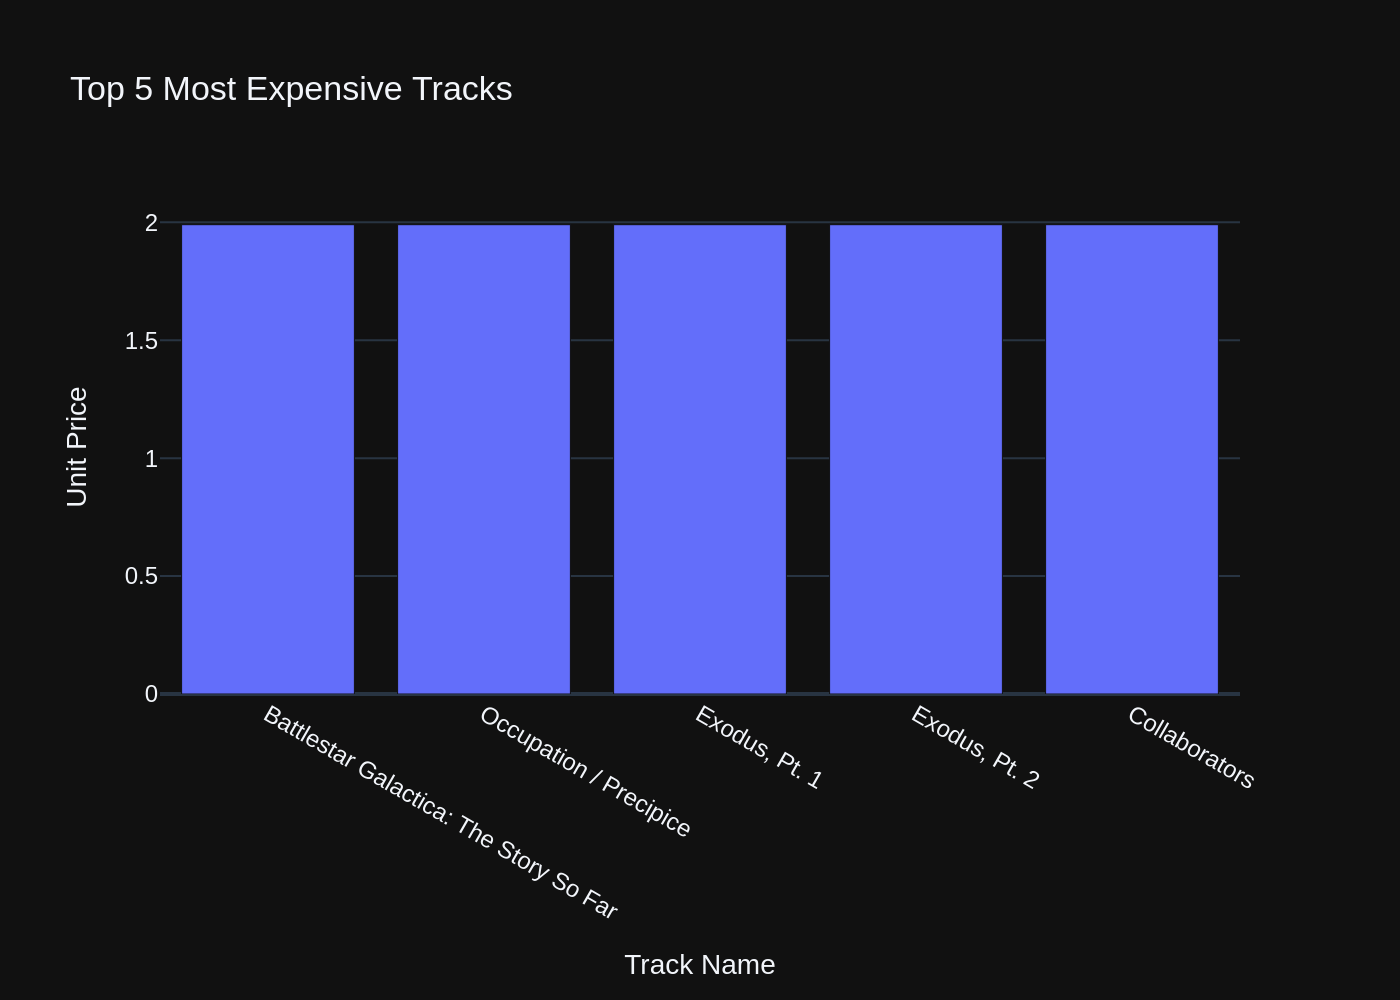





# QUESTION  - 15:  List all genres and the number of tracks in each genre:



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT g.Name AS GenreName, COUNT(t.TrackId) AS NumberOfTracks
FROM genres g
LEFT JOIN tracks t ON g.GenreId = t.GenreId
GROUP BY g.GenreId, g.Name ORDER BY NumberOfTracks DESC LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT g.Name AS GenreName, COUNT(t.TrackId) AS NumberOfTracks
FROM genres g
LEFT JOIN tracks t ON g.GenreId = t.GenreId
GROUP BY g.GenreId, g.Name ORDER BY NumberOfTracks DESC LIMIT 20;


[( <DataFrame> )]
queried dataframe



,GenreName,NumberOfTracks
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if df['NumberOfTracks'].nunique() == 1:
    fig = px.indicator(value=df['NumberOfTracks'].iloc[0], title="Number of Tracks per Genre")
else:
    fig = px.bar(df, x='GenreName', y='NumberOfTracks', text='NumberOfTracks')
fig.update_layout(title="Number of Tracks in Each Genre", xaxis_title="Genre Name", yaxis_title="Number of Tracks")

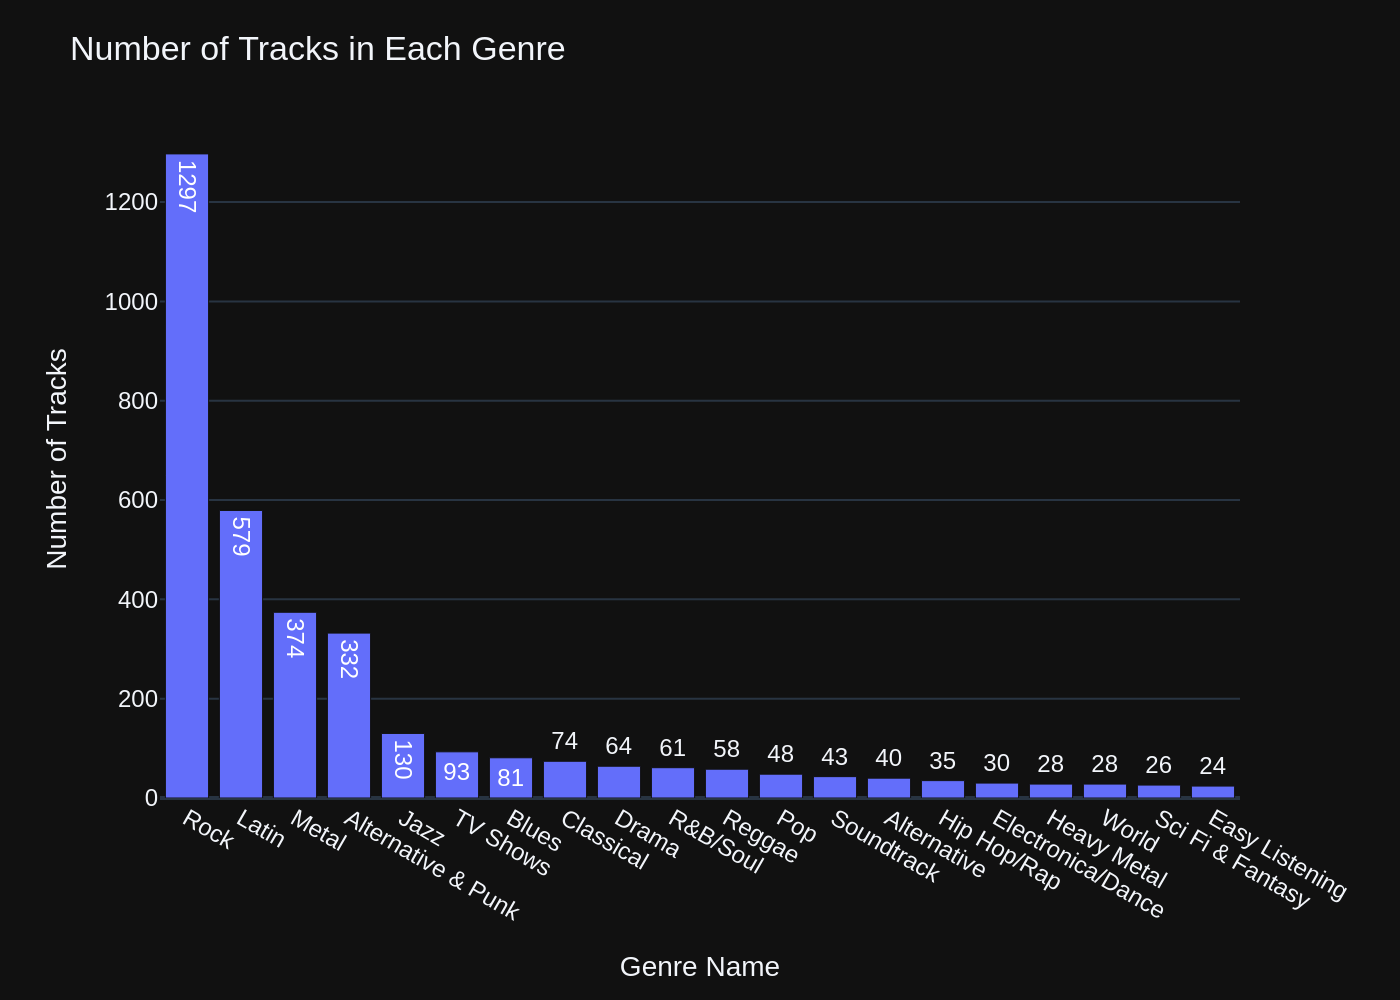





# QUESTION  - 16:  Get all genres that do not have any tracks associated with them:



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT DISTINCT g.Name AS GenreName
FROM genres g
WHERE NOT EXISTS (
    SELECT 1 FROM tracks t WHERE t.GenreId = g.GenreId
) LIMIT 20;


Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
with them:

```sql
SELECT DISTINCT g.Name AS GenreName
FROM genres g
WHERE NOT EXISTS (
    SELECT 1 FROM tracks t WHERE t.GenreId = g.GenreId
) LIMIT 20;


[( <SQL> )]
generated SQL statement



with them:

```sql
SELECT DISTINCT g.Name AS GenreName
FROM genres g
WHERE NOT EXISTS (
    SELECT 1 FROM tracks t WHERE t.GenreId = g.GenreId
) LIMIT 20;


[( RETRY )]
***** 1 *****


Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT DISTINCT g.Name AS GenreName
FROM genres g
WHERE NOT EXISTS (
    SELECT 1 FROM tracks t WHERE t.GenreId = g.GenreId
) LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT DISTINCT g.Name AS GenreName
FROM genres g
WHERE NOT EXISTS (
    SELECT 1 FROM tracks t WHERE t.GenreId = g.GenreId
) LIMIT 20;


[( <DataFrame> )]
queried dataframe



,GenreName






# QUESTION  - 17:  List all customers who have not placed any orders:



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT c.*
FROM customers c
LEFT JOIN invoices i ON c.CustomerId = i.CustomerId
WHERE i.InvoiceId IS NULL LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT c.*
FROM customers c
LEFT JOIN invoices i ON c.CustomerId = i.CustomerId
WHERE i.InvoiceId IS NULL LIMIT 20;


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId






# QUESTION  - 18:   
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT a.Name AS ArtistName, COUNT(t.TrackId) AS NumberOfTracks
FROM artists a
JOIN albums al ON a.ArtistId = al.ArtistId
JOIN tracks t ON al.AlbumId = t.AlbumId
GROUP BY a.ArtistId
ORDER BY NumberOfTracks DESC
LIMIT 10;


[( <SQL> )]
generated SQL statement



SELECT a.Name AS ArtistName, COUNT(t.TrackId) AS NumberOfTracks
FROM artists a
JOIN albums al ON a.ArtistId = al.ArtistId
JOIN tracks t ON al.AlbumId = t.AlbumId
GROUP BY a.ArtistId
ORDER BY NumberOfTracks DESC
LIMIT 10;


[( <DataFrame> )]
queried dataframe



,ArtistName,NumberOfTracks
0,Iron Maiden,213
1,U2,135
2,Led Zeppelin,114
3,Metallica,112
4,Deep Purple,92
5,Lost,92
6,Pearl Jam,67
7,Lenny Kravitz,57
8,Various Artists,56
9,The Office,53



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
import pandas as pd

if len(df) == 1:
    fig = px.indicator(value=df['NumberOfTracks'].iloc[0], title="Top 10 Most Popular Artists by Number of Tracks")
else:
    fig = px.bar(df, x='ArtistName', y='NumberOfTracks', text='NumberOfTracks', color='NumberOfTracks', title="Top 10 Most Popular Artists by Number of Tracks", labels={"NumberOfTracks": "Number of Tracks"})

fig.update_layout(xaxis_title="Artist Name", yaxis_title="Number of Tracks")

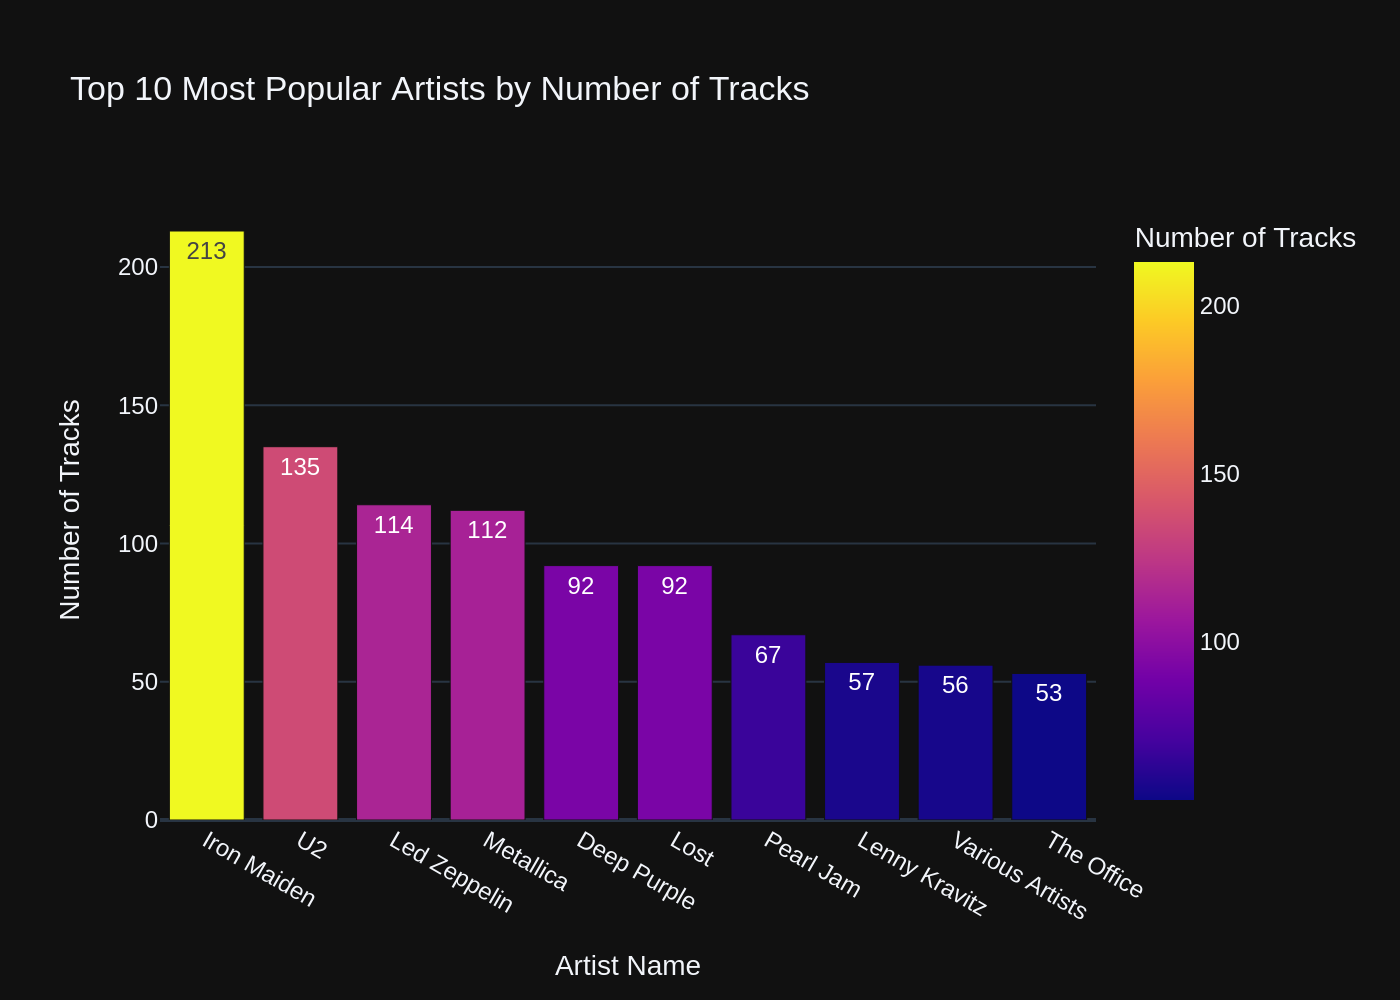





# QUESTION  - 19:  List all customers from Canada and their email addresses:



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT FirstName, LastName, Email
FROM customers
WHERE Country = 'Canada' ORDER BY LastName, FirstName LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT FirstName, LastName, Email
FROM customers
WHERE Country = 'Canada' ORDER BY LastName, FirstName LIMIT 20;


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,Email
0,Robert,Brown,robbrown@shaw.ca
1,Edward,Francis,edfrancis@yachoo.ca
2,Aaron,Mitchell,aaronmitchell@yahoo.ca
3,Jennifer,Peterson,jenniferp@rogers.ca
4,Mark,Philips,mphilips12@shaw.ca
5,Martha,Silk,marthasilk@gmail.com
6,Ellie,Sullivan,ellie.sullivan@shaw.ca
7,François,Tremblay,ftremblay@gmail.com



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if df.shape[0] == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['FirstName'].iloc[0],
        title={"text": "Customer Information"}
    ))
else:
    fig = go.Figure(data=[go.Table(header=dict(values=['First Name', 'Last Name', 'Email']),
                                   cells=dict(values=[df['FirstName'], df['LastName'], df['Email']]))])

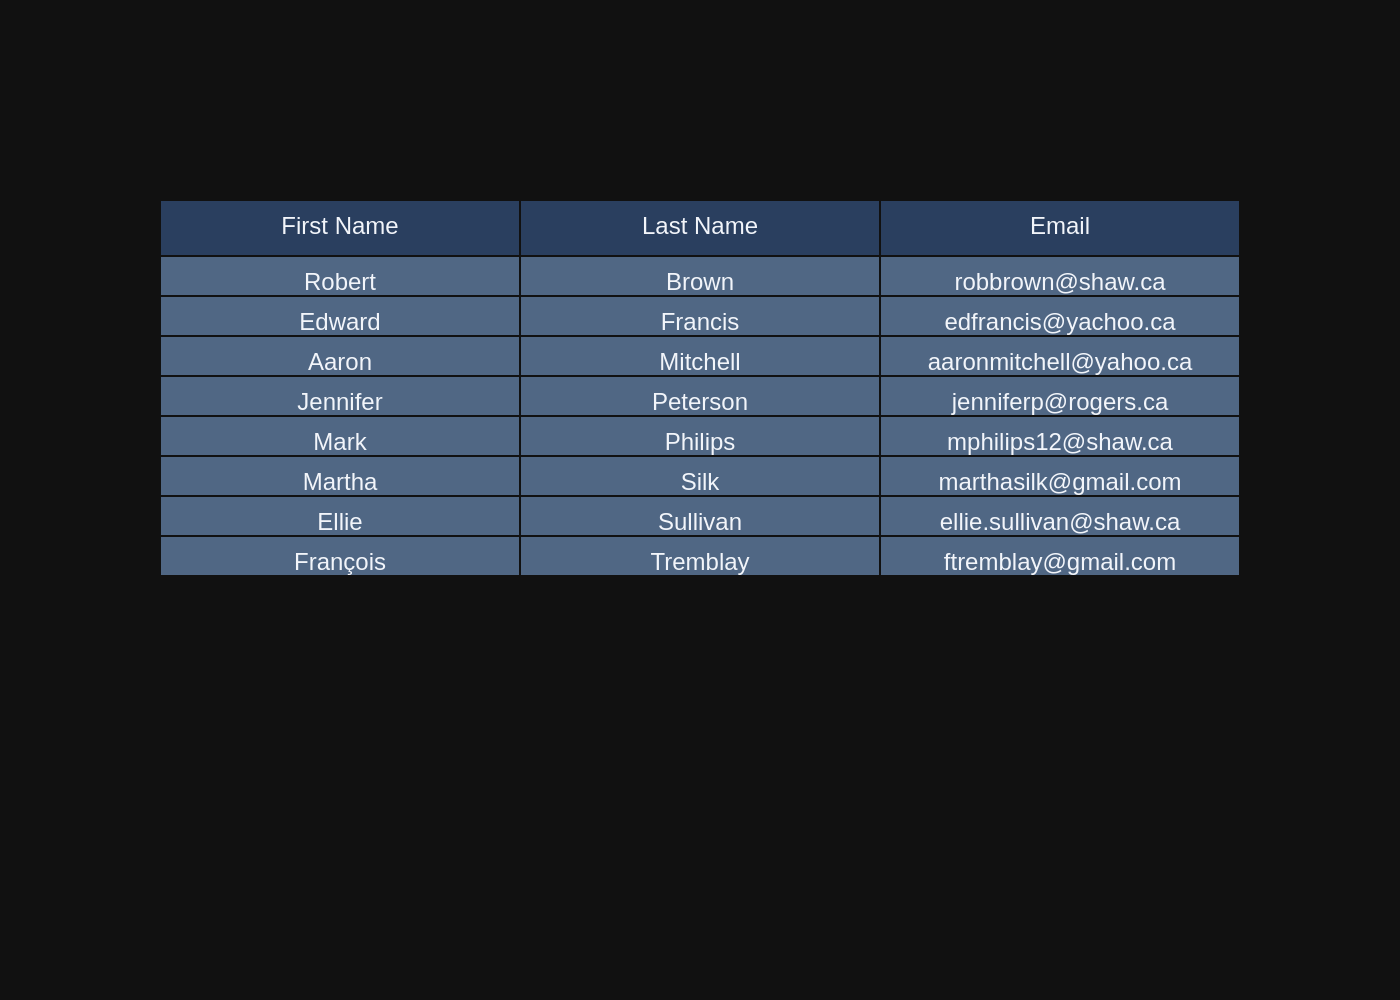





# QUESTION  - 20:  Find the customer with the most invoices 



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT c.CustomerId, c.FirstName, c.LastName, COUNT(i.InvoiceId) AS TotalInvoices
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId
ORDER BY TotalInvoices DESC
LIMIT 1;


[( <SQL> )]
generated SQL statement



SELECT c.CustomerId, c.FirstName, c.LastName, COUNT(i.InvoiceId) AS TotalInvoices
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId
ORDER BY TotalInvoices DESC
LIMIT 1;


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,TotalInvoices
0,1,Luís,Gonçalves,7



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go
import pandas as pd

# Assuming df is already defined and contains the data from the query
if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['TotalInvoices'].values[0],
        title={"text": f"{df['FirstName'].values[0]} {df['LastName'].values[0]} has the most invoices."}
    ))
else:
    fig = go.Figure(go.Bar(
        x=[f"{row['FirstName']} {row['LastName']}" for index, row in df.iterrows()],
        y=df['TotalInvoices'],
        text=[f"Customer ID: {row['CustomerId']}" for index, row in df.iterrows()]
    ))

fig.update_layout(title="Customer with Most Invoices")

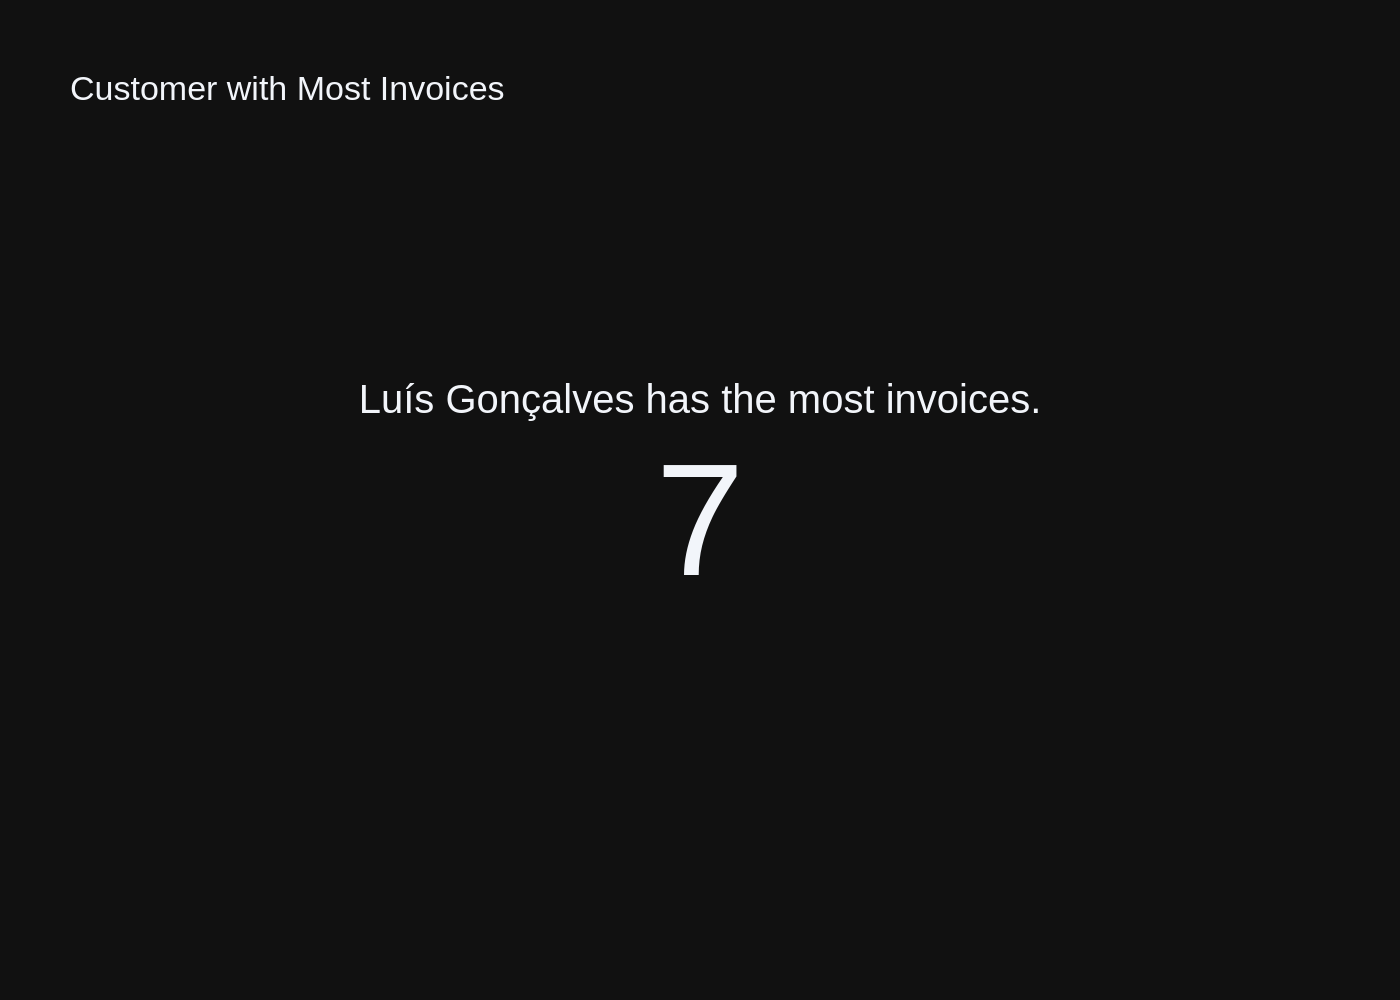





# QUESTION  - 21:  Find the customer who bought the most albums in total quantity (across all invoices):



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
with the most total quantity of any specific track across all their invoices:

SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalAlbumQuantity
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId
WHERE ii.TrackId IN (SELECT TrackId FROM tracks WHERE Name LIKE '%specific track name%') -- Replace 'specific track name' with the actual track name or use a more precise query if you have specific knowledge of which tracks to sum up
GROUP BY c.CustomerId, c.FirstName, c.LastName
ORDER BY TotalAlbumQuantity DESC
LIMIT 1;


[( <SQL> )]
generated SQL statement



with the most total quantity of any specific track across all their invoices:

SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalAlbumQuantity
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId
WHERE ii.TrackId IN (SELECT TrackId FROM tracks WHERE Name LIKE '%specific track name%') -- Replace 'specific track name' with the actual track name or use a more precise query if you have specific knowledge of which tracks to sum up
GROUP BY c.CustomerId, c.FirstName, c.LastName
ORDER BY TotalAlbumQuantity DESC
LIMIT 1;


[( RETRY )]
***** 1 *****


Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[ERROR-SQL] Failed to generate SQL for prompt: 
                    For this question: Find the customer who bought the most albums in total quantity (across all invoices):, 
                    your generated SQL statement: with the most total quantity of any specific track across all their invoices:

SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalAlbumQuantity
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId
WHERE ii.TrackId IN (SELECT TrackId FROM tracks WHERE Name LIKE '%specific track name%') -- Replace 'specific track name' with the actual track name or use a more precise query if you have specific knowledge of which tracks to sum up
GROUP BY c.CustomerId, c.FirstName, c.LastName
ORDER BY TotalAlbumQuantity DESC
LIMIT 1; results in the following error: [ERROR-DB] Failed to execute SQ

SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalAlbumQuantity
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbumQuantity DESC
LIMIT 5;


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,TotalAlbumQuantity
0,1,Luís,Gonçalves,38
1,2,Leonie,Köhler,38
2,3,François,Tremblay,38
3,4,Bjørn,Hansen,38
4,5,František,Wichterlová,38



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if df['TotalAlbumQuantity'].nunique() == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['TotalAlbumQuantity'].iloc[0],
        title={"text": "Top Customers' Total Album Quantity"},
        number={'prefix': ''}
    ))
else:
    fig = go.Figure(data=[go.Bar(x=df['FirstName'] + ' ' + df['LastName'], y=df['TotalAlbumQuantity'])])

fig.update_layout(title='Top 5 Customers by Total Album Quantity', xaxis_title='Customer Name', yaxis_title='Total Album Quantity')

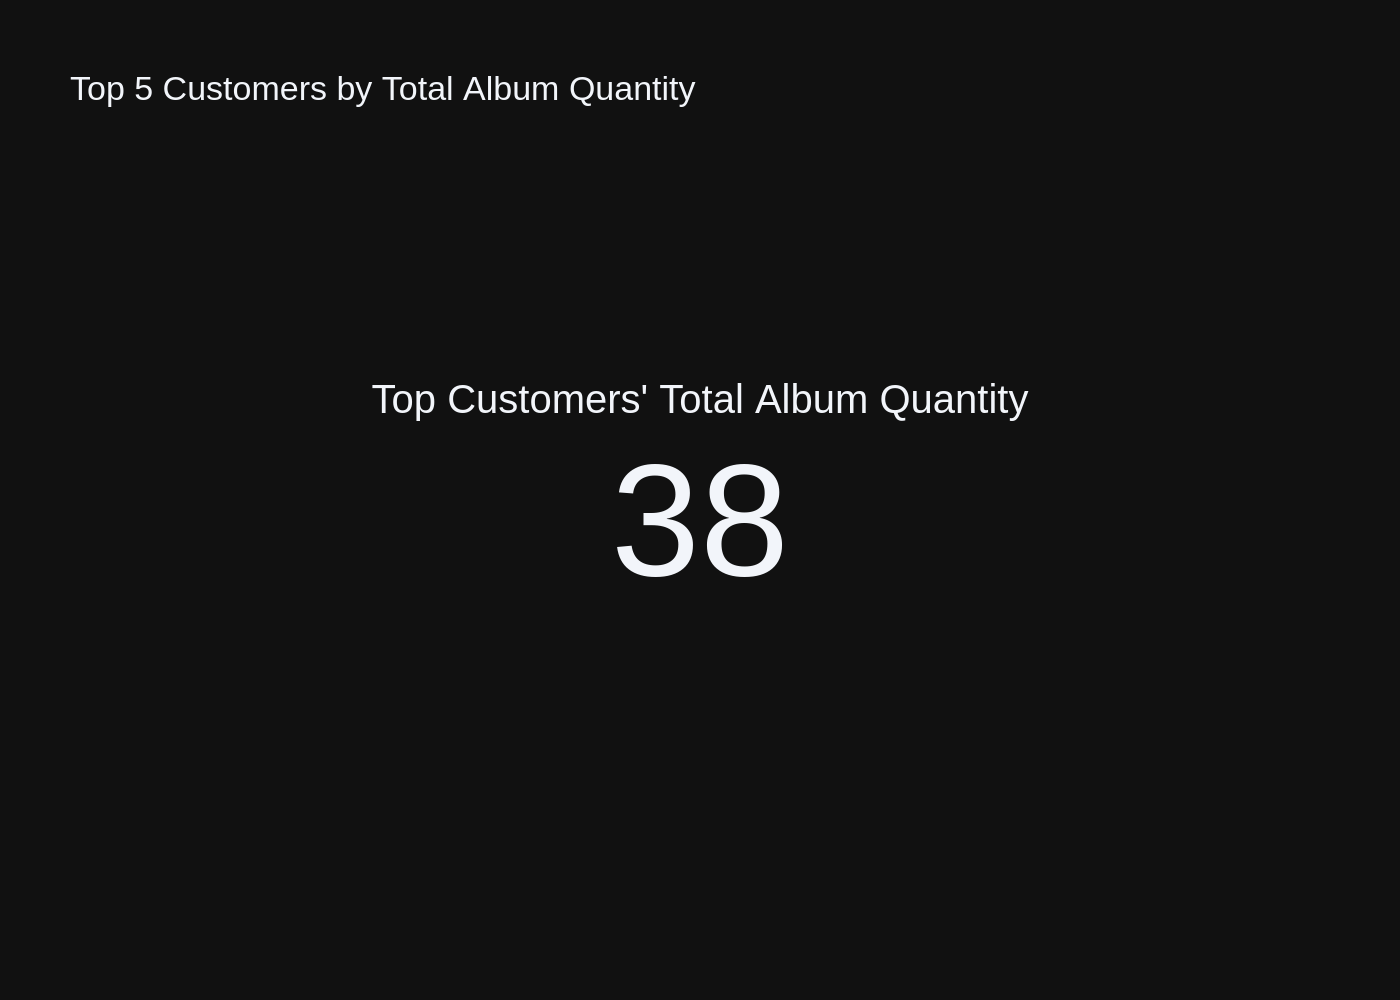





# QUESTION  - 23:    
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[ERROR-SQL] Failed to generate SQL for prompt:   
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
     with the following exception: 
an unknown error was encountered while running the model 

Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[ERROR-SQL] Failed to generate SQL for prompt:   
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
     with the following exception: 
an un

SELECT c.CustomerId, c.FirstName, c.LastName, SUM(i.Total) AS TotalSpent
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId
ORDER BY TotalSpent DESC
LIMIT 5;


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,TotalSpent
0,6,Helena,Holý,49.62
1,26,Richard,Cunningham,47.62
2,57,Luis,Rojas,46.62
3,45,Ladislav,Kovács,45.62
4,46,Hugh,O'Reilly,45.62



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

fig = go.Figure()

if len(df) == 1:
    fig.add_trace(go.Indicator(
        mode="number",
        value=df['TotalSpent'].iloc[0],
        title={"text": "Total Spent"},
        domain={'x': [0, 1], 'y': [0, 1]}
    ))
else:
    fig.add_trace(go.Bar(
        x=df['LastName'],
        y=df['TotalSpent'],
        text=df['TotalSpent'],
        marker_color='rgba(55, 128, 191, 0.7)'
    ))

fig.update_layout(title="Top 5 Customers by Total Spent",
                  xaxis_title="Customer Last Name",
                  yaxis_title="Total Spent")

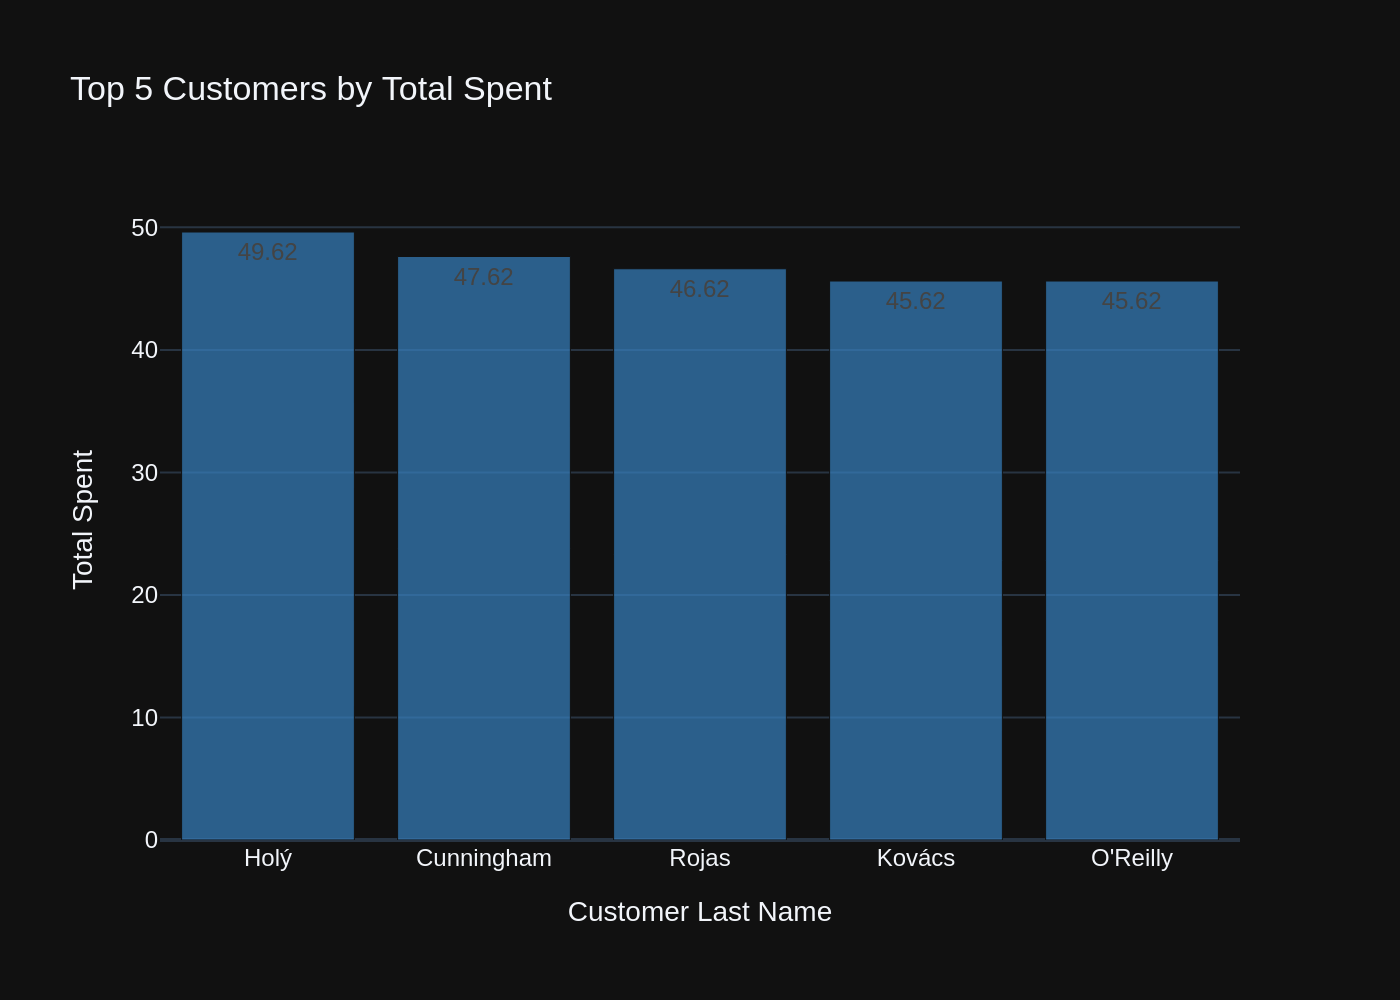





# QUESTION  - 24:  Get all playlists containing at least 10 tracks and the total duration of those tracks:



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[ERROR-SQL] Failed to generate SQL for prompt: Get all playlists containing at least 10 tracks and the total duration of those tracks: with the following exception: 
an unknown error was encountered while running the model 

Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
SELECT p.PlaylistId, p.Name AS PlaylistName, SUM(t.Milliseconds) AS TotalDuration
FROM playlists p
JOIN playlist_track pt ON p.PlaylistId = pt.PlaylistId
JOIN tracks t ON pt.TrackId = t.TrackId
GROUP BY p.PlaylistId
HAVING COUNT(pt.TrackId) >= 10;


[( <SQL> )]
generated SQL statement



SELECT p.PlaylistId, p.Name AS PlaylistName, SUM(t.Milliseconds) AS TotalDuration
FROM playlists p
JOIN playlist_track pt ON p.PlaylistId = pt.PlaylistId
JOIN tracks t ON pt.TrackId = t.TrackId
GROUP BY p.PlaylistId
HAVING COUNT(pt.TrackId) >= 10;


[( <DataFrame> )]
queried dataframe



,PlaylistId,PlaylistName,TotalDuration
0,1,Music,877683083
1,3,TV Shows,501094957
2,5,90’s Music,398705153
3,8,Music,877683083
4,10,TV Shows,501094957
5,11,Brazilian Music,9486559
6,12,Classical,21770592
7,13,Classical 101 - Deep Cuts,6755730
8,14,Classical 101 - Next Steps,7575051
9,15,Classical 101 - The Basics,7439811



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['TotalDuration'].iloc[0],
        title={"text": "Total Duration"},
        domain={'x': [0, 1], 'y': [0, 1]}
    ))
else:
    fig = go.Figure(data=[go.Bar(x=df['PlaylistName'], y=df['TotalDuration'])])

fig.update_layout(title='Playlists with at least 10 tracks and their total duration')

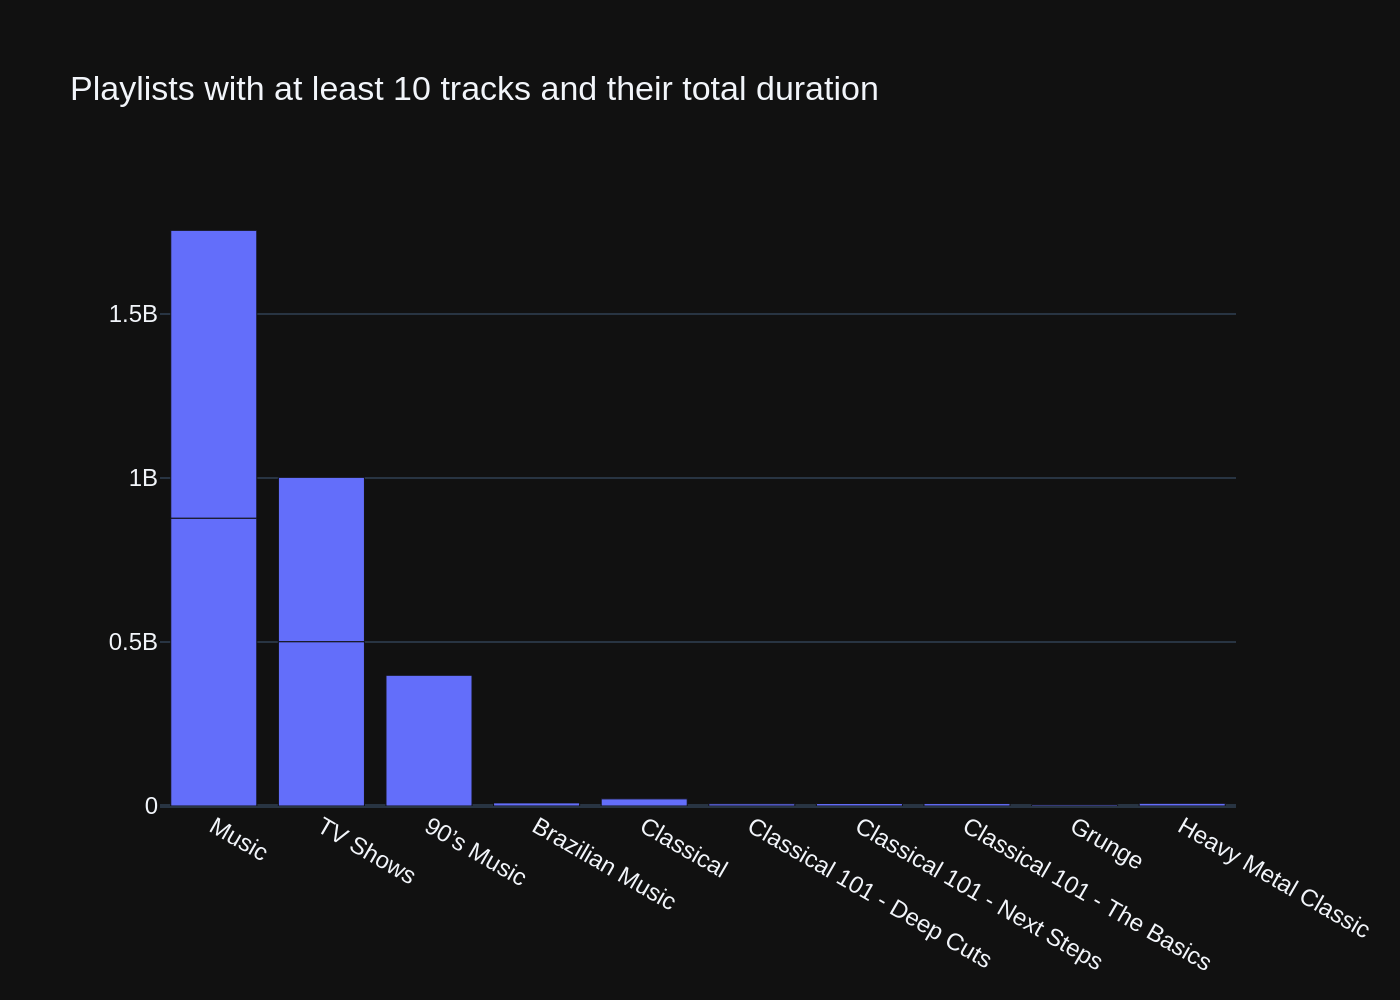





# QUESTION  - 25:  Identify artists who have albums with tracks appearing in multiple genres:



Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[ERROR-SQL] Failed to generate SQL for prompt: Identify artists who have albums with tracks appearing in multiple genres: with the following exception: 
an unknown error was encountered while running the model 

Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[ERROR-SQL] Failed to generate SQL for prompt: Identify artists who have albums with tracks appearing in multiple genres: with the following exception: 
an unknown error was encountered while running the model 

[( RETRY )]
***** 1 *****


Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None


[( EXTRACTED SQL )]
with tracks appearing in multiple genres, we need to join the `artists`, `albums`, `tracks`, and `genres` tables. We will group by artist and check for distinct genre counts. Here is the

with tracks appearing in multiple genres, we need to join the `artists`, `albums`, `tracks`, and `genres` tables. We will group by artist and check for distinct genre counts. Here is the corrected SQL query:

```sql
SELECT a.Name AS ArtistName
FROM artists a
JOIN albums al ON a.ArtistId = al.ArtistId
JOIN tracks t ON al.AlbumId = t.AlbumId
GROUP BY a.ArtistId
HAVING COUNT(DISTINCT t.GenreId) > 1;


[( RETRY )]
***** 2 *****


Ollama parameters:
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[ERROR-SQL] Failed to generate SQL for prompt: 
                    For this question: 
                    For this question: Identify artists who have albums with tracks appearing in multiple genres:, 
                    your generated SQL statement: None results in the following error: [ERROR-SQL] Failed to generate SQL for prompt: Identify artists who have albums with tracks appearing in multiple genres: with the following exception: 
an unknown error was encountered while running the model  .
                    Can you please fix this error and re-generate the SQL statement?
                , 
                    your generated SQL statement: with tracks appearing in multiple genres, we need to join the `artists`, `albums`, `tracks`, and `genres` tables. We will group by artist and check for distinct genre counts. Here is the corrected SQL query:

```sql
SELECT a.Name AS 

In [15]:
ts_start = time()
for n, question in enumerate(questions):
    # if n != 4: continue
    # if n > 5: continue

    resp = vn.ask_adaptive(question=question, tag_id=n+2)
    # vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    # my_vn_ask(question=question, sql_id=n+2, allow_llm_to_see_data=allow_llm_to_see_data)

ts_stop = time()
elapsed_time = ts_stop - ts_start

### Check completion time

In [16]:
ts_stop = time()
elapsed_time = ts_stop - ts_start
str_elapsed_sec = f"{elapsed_time:.0f}"
ts = datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"Completed testing:\n================\n LLM model '{model_name}' \n took {str_elapsed_sec} sec\n run on '{hostname}' \n at {ts}")

Completed testing:
 LLM model 'deepseek-coder-v2' 
 took 366 sec
 run on 'papa-game' 
 at 20241116-124210


In [17]:
file_csv = f"training_data-{model_name}-{str_elapsed_sec}s-{hostname}-{ts}.csv"
file_csv

'training_data-deepseek-coder-v2-366s-papa-game-20241116-124210.csv'

### Save training data

In [18]:
# show training data
df_training_data = vn.get_training_data()
df_training_data

,id,question,content,training_data_type
0,0a39f28e-4263-5d39-99c9-d3384f17923b-sql,\n Find the top 5 customers who b...,"SELECT c.CustomerId, c.FirstName, c.LastName, ...",sql
1,3839630a-e1a3-5502-89cc-0ec879997c30-sql,\n For this question: \n ...,SELECT * \nFROM tracks\nWHERE LOWER(Name) LIKE...,sql
2,3bbee3e2-ea7d-50ef-8f9e-0c6b284ea364-sql,Get the average invoice total for each customer:,"SELECT c.CustomerId, c.FirstName, c.LastName, ...",sql
3,40664a1e-4daa-5b18-a0ef-5cf6e676ab0a-sql,How many customers are there,SELECT COUNT(*) AS NumberOfCustomers\nFROM cus...,sql
4,4320a67a-8f4c-59c5-a234-8e23b72e6129-sql,\n Can you find the top 10 most popula...,"SELECT a.Name AS ArtistName, COUNT(t.TrackId) ...",sql
5,5c1ec1dd-ad4a-57ba-9131-db2f22ad3e96-sql,Get the total number of invoices for each cust...,"SELECT c.CustomerId, c.FirstName, c.LastName, ...",sql
6,64c7c4d1-d0b7-5c2b-baaa-cb5827bfad67-sql,Find the top 5 most expensive tracks (based on...,"SELECT Name, UnitPrice\nFROM tracks\nORDER BY ...",sql
7,69ef6f1e-6e76-5e25-a5fa-d92cb77cde0f-sql,List all genres and the number of tracks in ea...,"SELECT g.Name AS GenreName, COUNT(t.TrackId) A...",sql
8,78c94286-7fe9-53d6-ae67-158ce3a7639a-sql,\n For this question: \n ...,"SELECT c.CustomerId, c.FirstName, c.LastName, ...",sql
9,83199c55-763a-5fa0-b134-f2420364aabd-sql,List all customers from Canada and their email...,"SELECT FirstName, LastName, Email\nFROM custom...",sql


In [19]:
df_training_data.to_csv(file_csv, index=False)